# Description
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

## What is Parkinson’s Disease?
Parkinson’s disease is a central nervous system disorder. Its symptoms occur because of low dopamine levels in the brain. Four Primary symptoms are tremor, rigidity, slow movement and balance problems. Till now no cure for Parkinson’s Disease is known, treatment aims to reduce the effects of the symptoms.

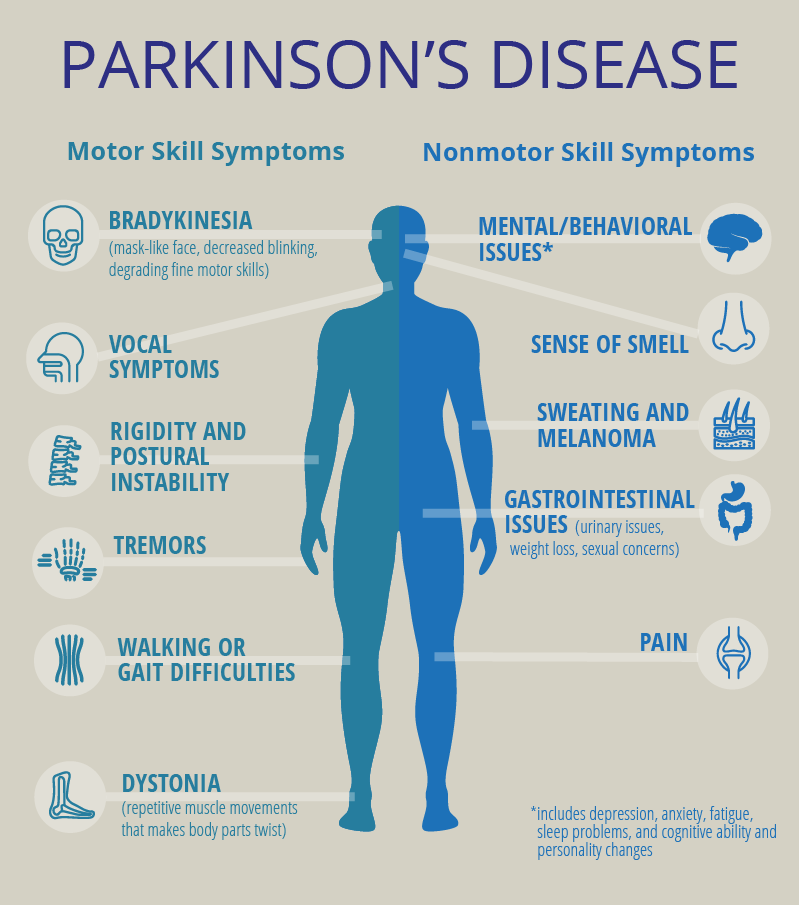

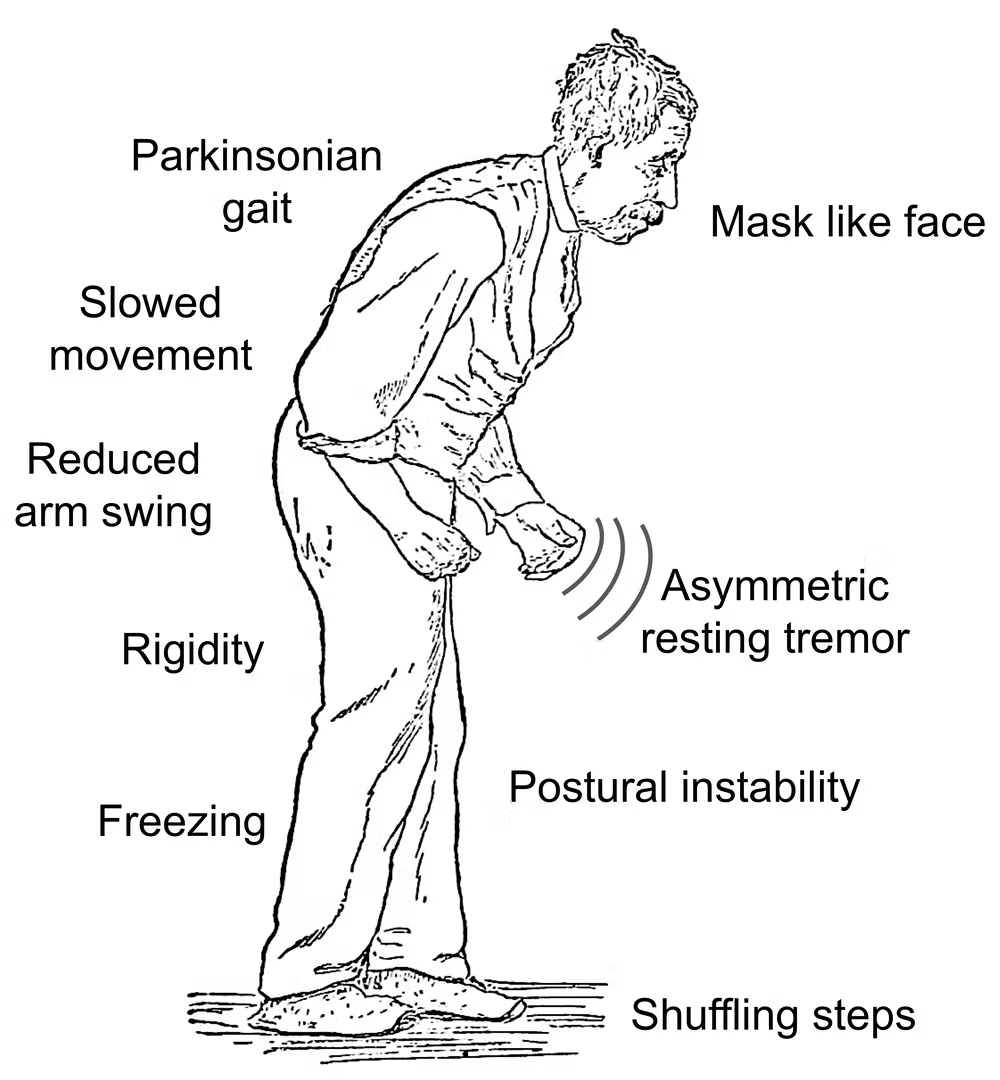

## Attribute Information:
**Matrix column entries (attributes):**

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

**NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice

**status** - The health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE, D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

## Source:
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

## Citation:
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

**Link for downloading dataset:
https://archive.ics.uci.edu/ml/datasets/parkinsons**

# Importing the Dependencies

In [1]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm                            # Support vector machine model 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

# Data Collection and Data Exploration

In [3]:
# Loading the data from CSV file to pandas dataframe
df = pd.read_csv("data.csv")

In [4]:
# Printing first five rows of the data
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [5]:
# Printing last five rows of the data
df.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

         NHR     HNR  status      RPDE       DFA   spread1   spread2  \
190  0.02764  19.517       0  0.448439  0.657899 -6.538586  0.121952   
191  0.01810  19.147       0  0.431674  0.683244 -6.195325  0.129303   
192  0.10715  17.883       0  0.407567  0.655683 -6.787197  0.158453   
193  0.07223  19.020       0  0.451221  0.643956 -6.744577  0.207454   
194  0.04398  21.209       0  0.462803  0.664357 -5.724056  0.190667   

           D2       PPE  
190  2.657476  0.133050  
191  2.784312  0.168895  
192  2.679772  0.131728  
193  2.138608  0.123306  
194  2.555477  0.148569

**Observations:**
"status" column is our target feature. "name" column has no use in prediction part so we will remove it(later but before prediction).

In [6]:
# Checking the number of rows and columns in our dataset
df.shape

(195, 24)

Dataset contains 195 rows and 24 columns

In [7]:
# Getting more information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Observations:**
"name" column is only object dtype, as told earlier I will remove this column as it is of no use in making prediction.
Each column has no null values seems. Let's check for null value in different way.

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Observations:**
There are no null values in our dataset

# Data Analysis and Data Visualization

In [9]:
# Getting some statistical information of our data
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA  \
count        195.000000    195.000000    195.000000  195.000000   195.000000   
mean           0.282251      0.015664      0.017878    0.024081     0.046993   
std            0.194877      0.010153      0.012024    0.016947     0.030459   
min            0.085000      0.004550      0.005700    0.007190     0.013640   
25%            0.148500      0.008245      0.009580    0.013080     0.024735   
50%            0.221000      0.012790      0.013470    0.018260     0.038360   
75%            0.350000      0.020265      0.022380    0.029400     0.060795   
max            1.302000      0.056470      0.079400    0.137780     0.169420   

              NHR         HNR      status        RPDE         DFA     spread1  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.753846    0.498536    0.718099   -5.684397   
std      0.040418    4.425764    0.431878    0.103942    0.055336    1.090208   
min      0.000650    8.441000    0.000000    0.256570    0.574282   -7.964984   
25%      0.005925   19.198000    1.000000    0.421306    0.674758   -6.450096   
50%      0.011660   22.085000    1.000000    0.495954    0.722254   -5.720868   
75%      0.025640   25.075500    1.000000    0.587562    0.761881   -5.046192   
max      0.314820   33.047000    1.000000    0.685151    0.825288   -2.434031   

          spread2          D2         PPE  
count  195.000000  195.000000  195.000000  
mean     0.226510    2.381826    0.206552  
std      0.083406    0.382799    0.090119  
min      0.006274    1.423287    0.044539  
25%      0.174351    2.099125    0.137451  
50%      0.218885    2.361532    0.194052  
75%      0.279234    2.636456    0.252980  
max      0.450493    3.671155    0.527367

## Distribution of our target variable i.e. "status" column

In [10]:
# distribution of our target variable i.e. "status" column/feature
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

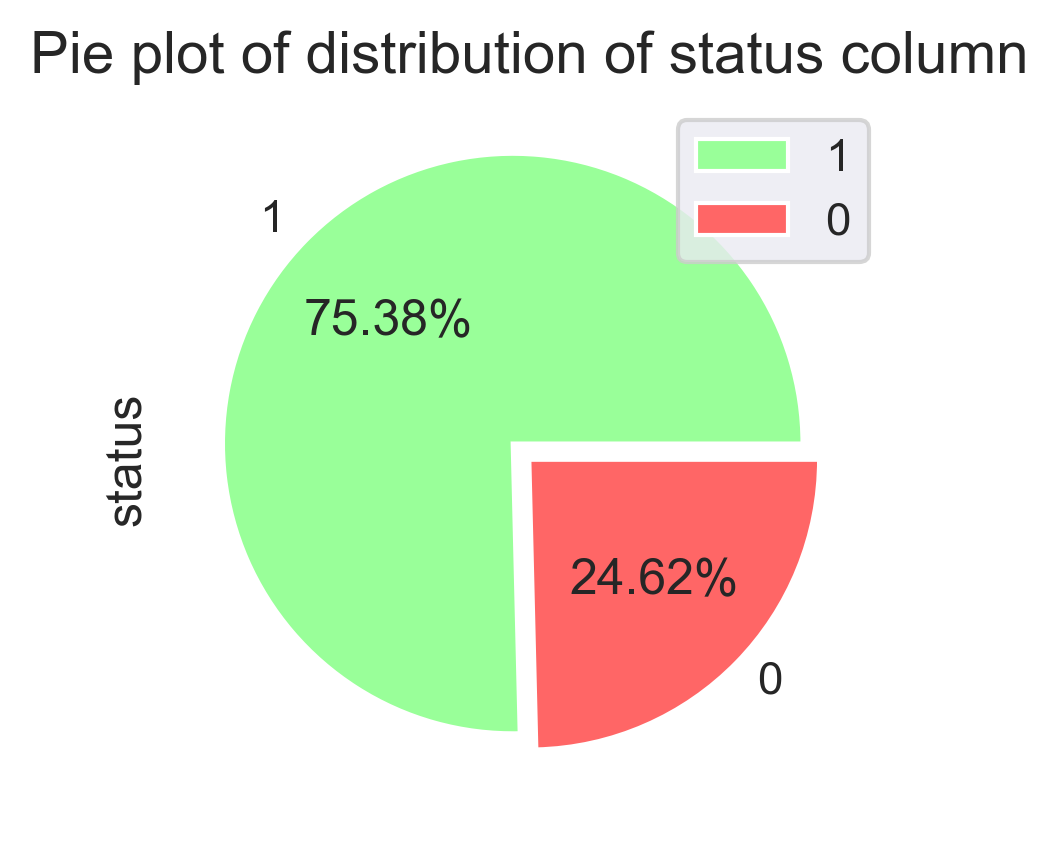

In [11]:
explode=(0.08,0)

df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

##### 1 ---> Peoples with Parkinsons disease
##### 0 ---> Healthy peoples

**Observations:**
75.38% peoples (i.e. 147 peoples out of 195 peoples) are those who have parkinson disease. While 24.62% peoples (i.e. 48 peoples out of 195 peoples) are those who don't have parkinsons disease.

## Grouping the data based on target variable

In [12]:
df.groupby("status").mean()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
status                                                                        
0               0.162958      0.009504      0.010509  0.013305     0.028511   
1               0.321204      0.017676      0.020285  0.027600     0.053027   

             NHR        HNR      RPDE       DFA   spread1   spread2        D2  \
status                                                                          
0       0.011483  24.678750  0.442552  0.695716 -6.759264  0.160292  2.154491   
1       0.029211  20.974048  0.516816  0.725408 -5.333420  0.248133  2.456058   

             PPE  
status            
0       0.123017  
1       0.233828

**Observations:**

Here we can clearly observe that peoples with Parkinsons disease have

less MDVP:Fo(Hz) value (around 145.180762),

less MDVP:Fhi(Hz) value (around 188.441463),

less MDVP:Flo(Hz) value (around 106.893558),

relatively high MDVP:Jitter(%) value (around 0.006989),

relatively high MDVP:Jitter(Abs) value (around 0.000051),

relatively high MDVP:RAP value (around 0.003757),

relatively high MDVP:PPQ value (around 0.003900),

relatively high Jitter:DDP value (around 0.011273),

relatively high MDVP:Shimmer value (around 0.033658),

relatively high MDVP:Shimmer(dB) value (around 0.321204),

relatively high Shimmer:APQ3 value (around 0.017676),

relatively high Shimmer:APQ5 value (around 0.020285),

relatively high MDVP:APQ value (around 0.027600),

relatively high Shimmer:DDA value (around 0.053027),

relatively high NHR value (around 0.029211),

less HNR value (around 20.974048),

relatively high RPDE value (around 0.516816),

relatively high DFA value (around 0.725408),

relatively high spread1 value (around -5.333420),

relatively high spread2 value (around 0.248133),

relatively high D2 value (around 2.456058), and

relatively high PPE value (around 0.233828)

**Observations:**
This distinction can be used for making prediction. So this understanding will be found automatically by our Machine Learning Model.

## Correlation Heatmap

<AxesSubplot:>

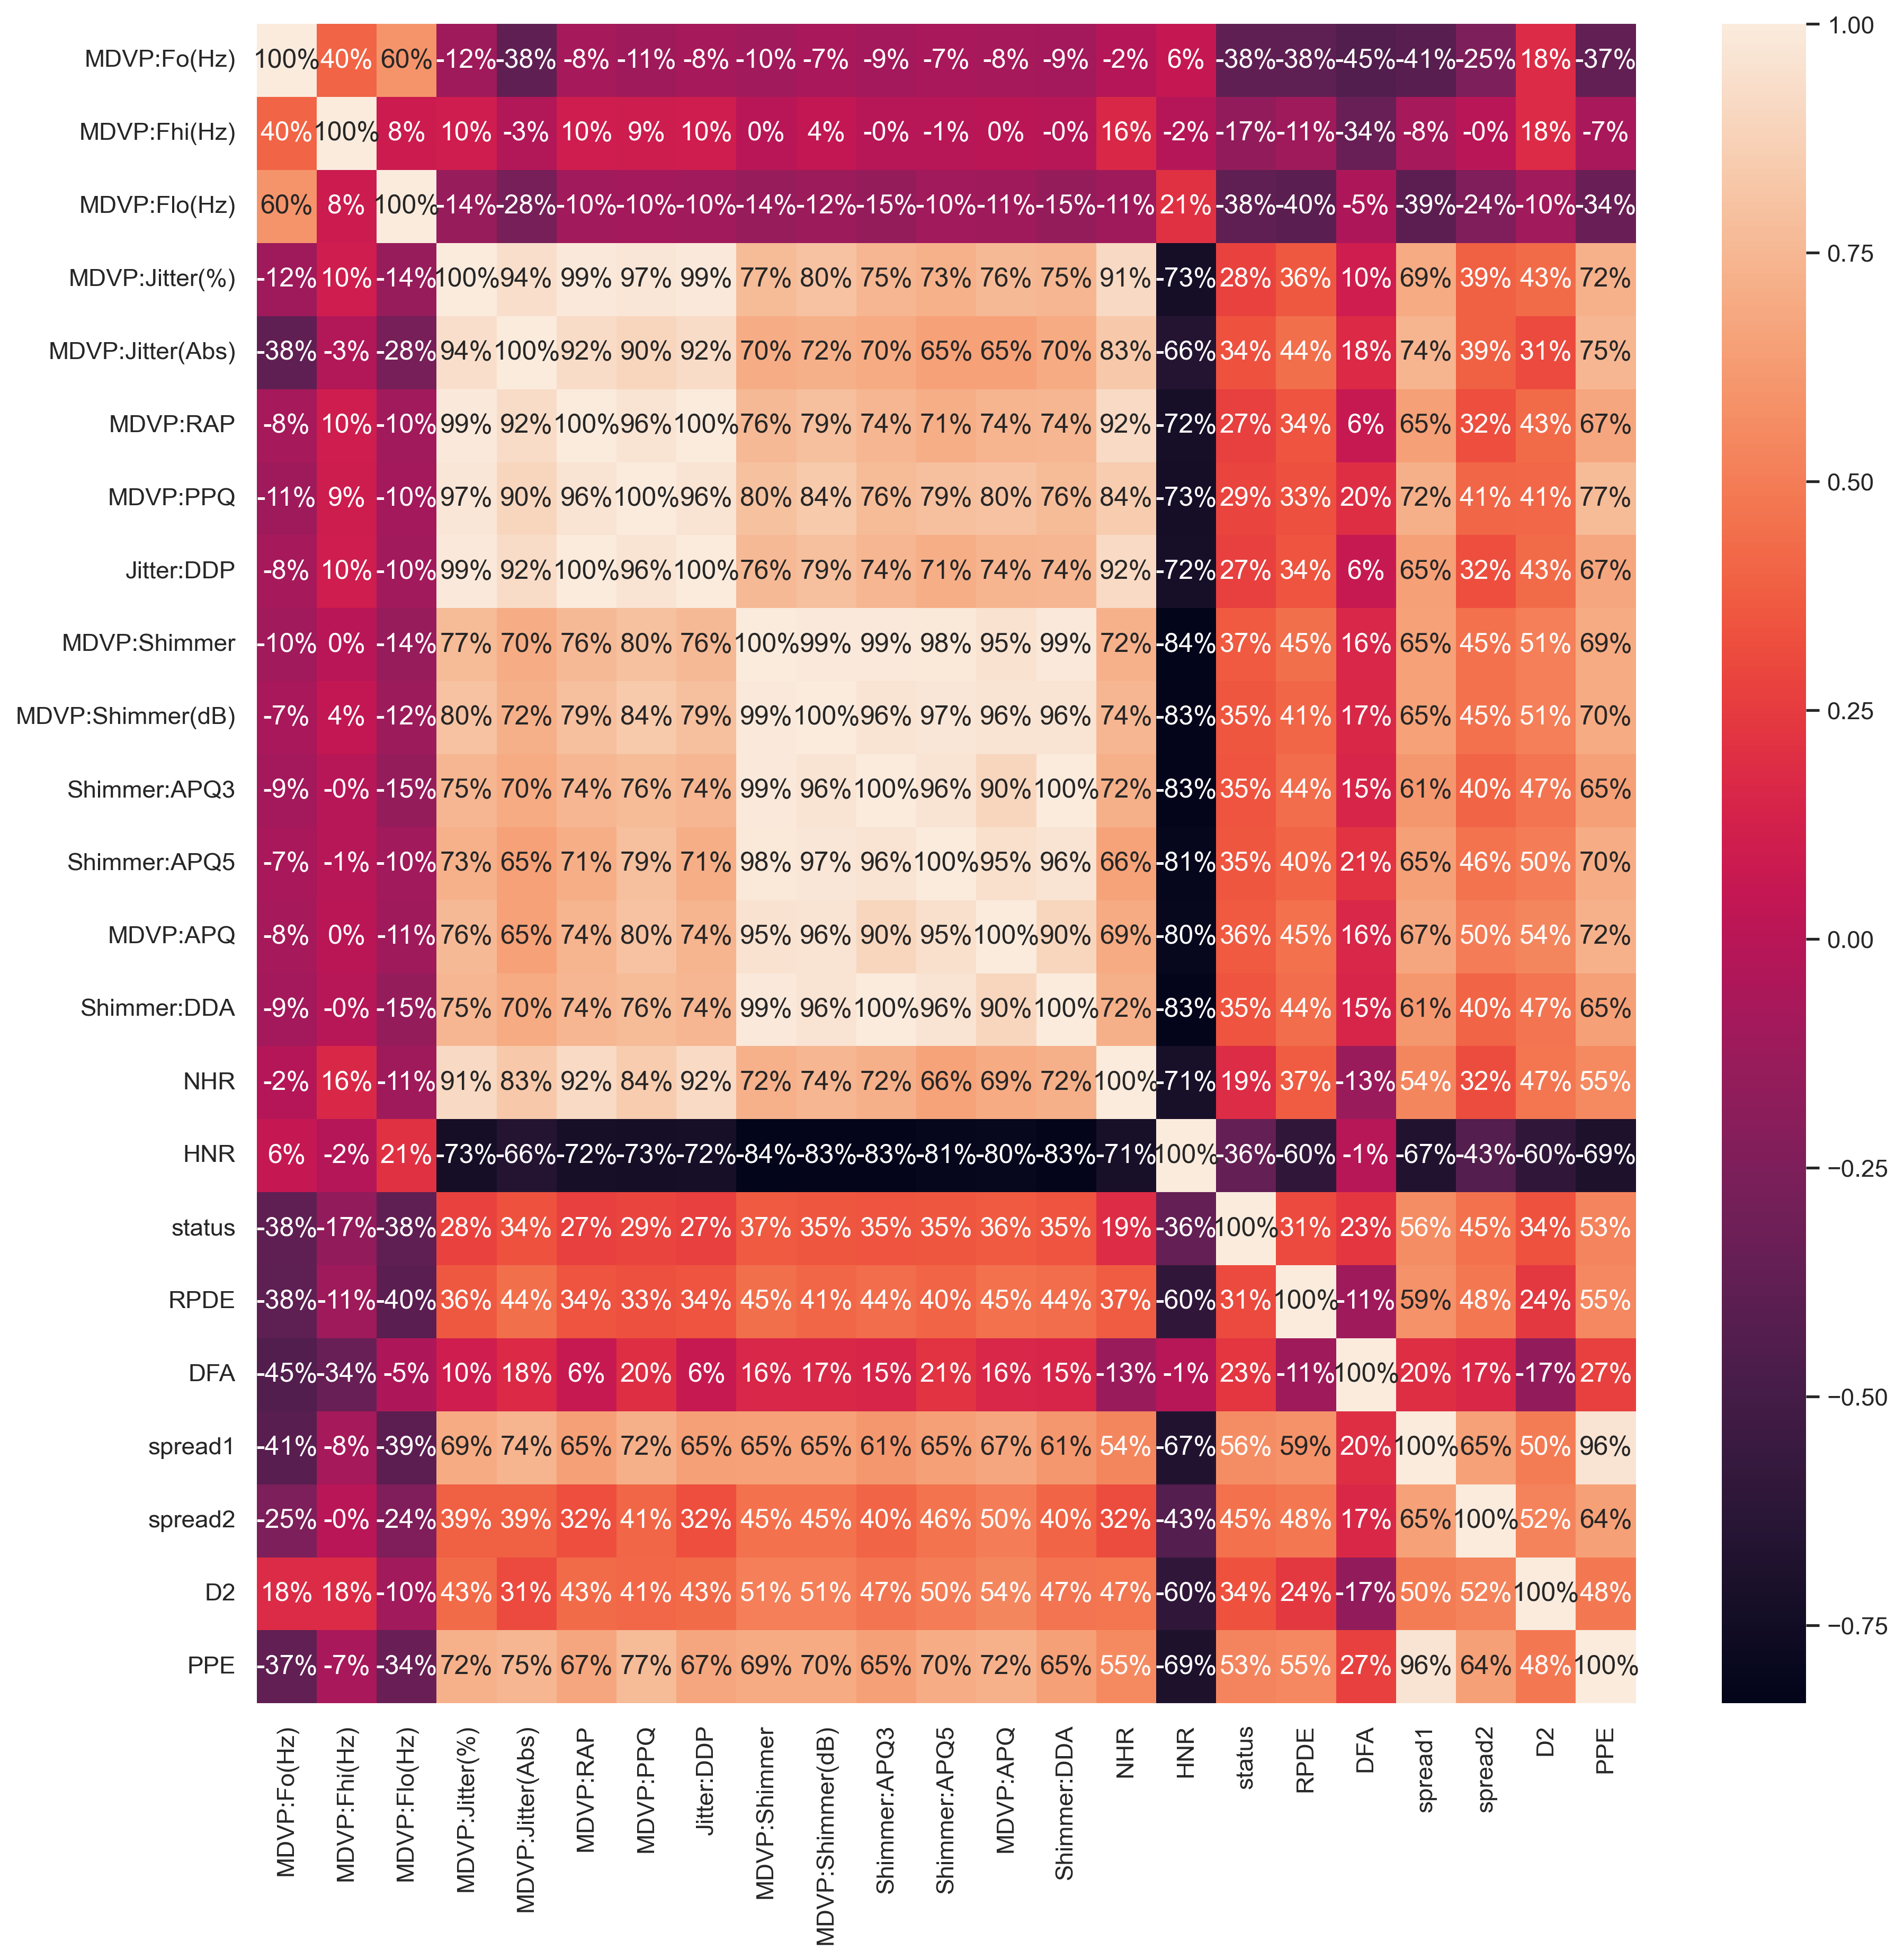

In [13]:
sns.set(font_scale=1.0)
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt = '.0%')

This is a heatmap indicating the percentage of correlation among each columns.

# Seperating target column

In [14]:
X = df.drop(["name", "status"], axis=1)
y = df["status"]

In [15]:
X.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spread2        D2       PPE  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Data Normalization

In [17]:
scaler = MinMaxScaler()
feature = scaler.fit_transform(X)
feature

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

## Splitting data into train and test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=42)
X_train

array([[0.53480777, 0.20230054, 0.63318249, ..., 0.46378025, 0.376406  ,
        0.20170744],
       [0.64559416, 0.21916776, 0.72895437, ..., 0.376042  , 0.30242835,
        0.04962844],
       [0.14776564, 0.02918644, 0.18099071, ..., 0.41843325, 0.19096095,
        0.27988849],
       ...,
       [0.34894511, 0.12828317, 0.44228931, ..., 0.18361664, 0.40974337,
        0.29399703],
       [0.34819412, 0.10989722, 0.40050318, ..., 0.52812014, 0.63252024,
        0.30692296],
       [0.29627064, 0.9888484 , 0.00392069, ..., 0.59512763, 0.56392546,
        0.82893908]])

In [19]:
y_train.head()

38     1
31     0
173    0
12     1
109    1
Name: status, dtype: int64

In [20]:
X_test

array([[0.13917286, 0.04993825, 0.22233929, ..., 0.67475727, 0.44307139,
        0.34101585],
       [0.32516941, 0.50443267, 0.09953136, ..., 0.52561912, 0.37422749,
        0.35960011],
       [0.17195468, 0.05144881, 0.17374233, ..., 0.45392025, 0.45212174,
        0.33493708],
       ...,
       [0.70332185, 0.27628729, 0.2527606 , ..., 0.13668934, 0.46155023,
        0.11800683],
       [0.22128752, 0.065497  , 0.27230071, ..., 0.64310622, 0.44867715,
        0.12727928],
       [0.86083296, 0.29092134, 0.21106659, ..., 0.37368055, 0.36119114,
        0.15556886]])

In [21]:
y_test.head()

138    1
16     1
155    1
96     1
68     1
Name: status, dtype: int64

##### "X_train" represents training data and "X_test" represents test data. "y_train" represents outcome (status like person have parkinsons disease or not) of training data while "y_test" represents outcome (status like person have parkinsons disease or not) of test data.

In [22]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (136, 22)
Shape of y_train: (136,)
Shape of X_test: (59, 22)
Shape of y_test: (59,)


# Model Building

## Logistic Regression

In [23]:
lr =LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59

Accuracy: 0.864406779661017
Precision: 0.86
Recall: 0.9772727272727273


##### Accuracy = Proportion of correct prediction over total prediction
##### When a person have Parkinsons disease, how often does my classifier predict that correctly? This measurement is called “recall”
##### Recall = Out of actual positive(True positive + False negative), how many are True positive
##### Precision Out of predicted positive (true positive + False positive), how many are True positive

In [24]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8602941176470589
0.864406779661017


**Observations:**
Model isn't overfitting as well as not underfitting.

### Confusion matrix of Logistic regression model

<AxesSubplot:>

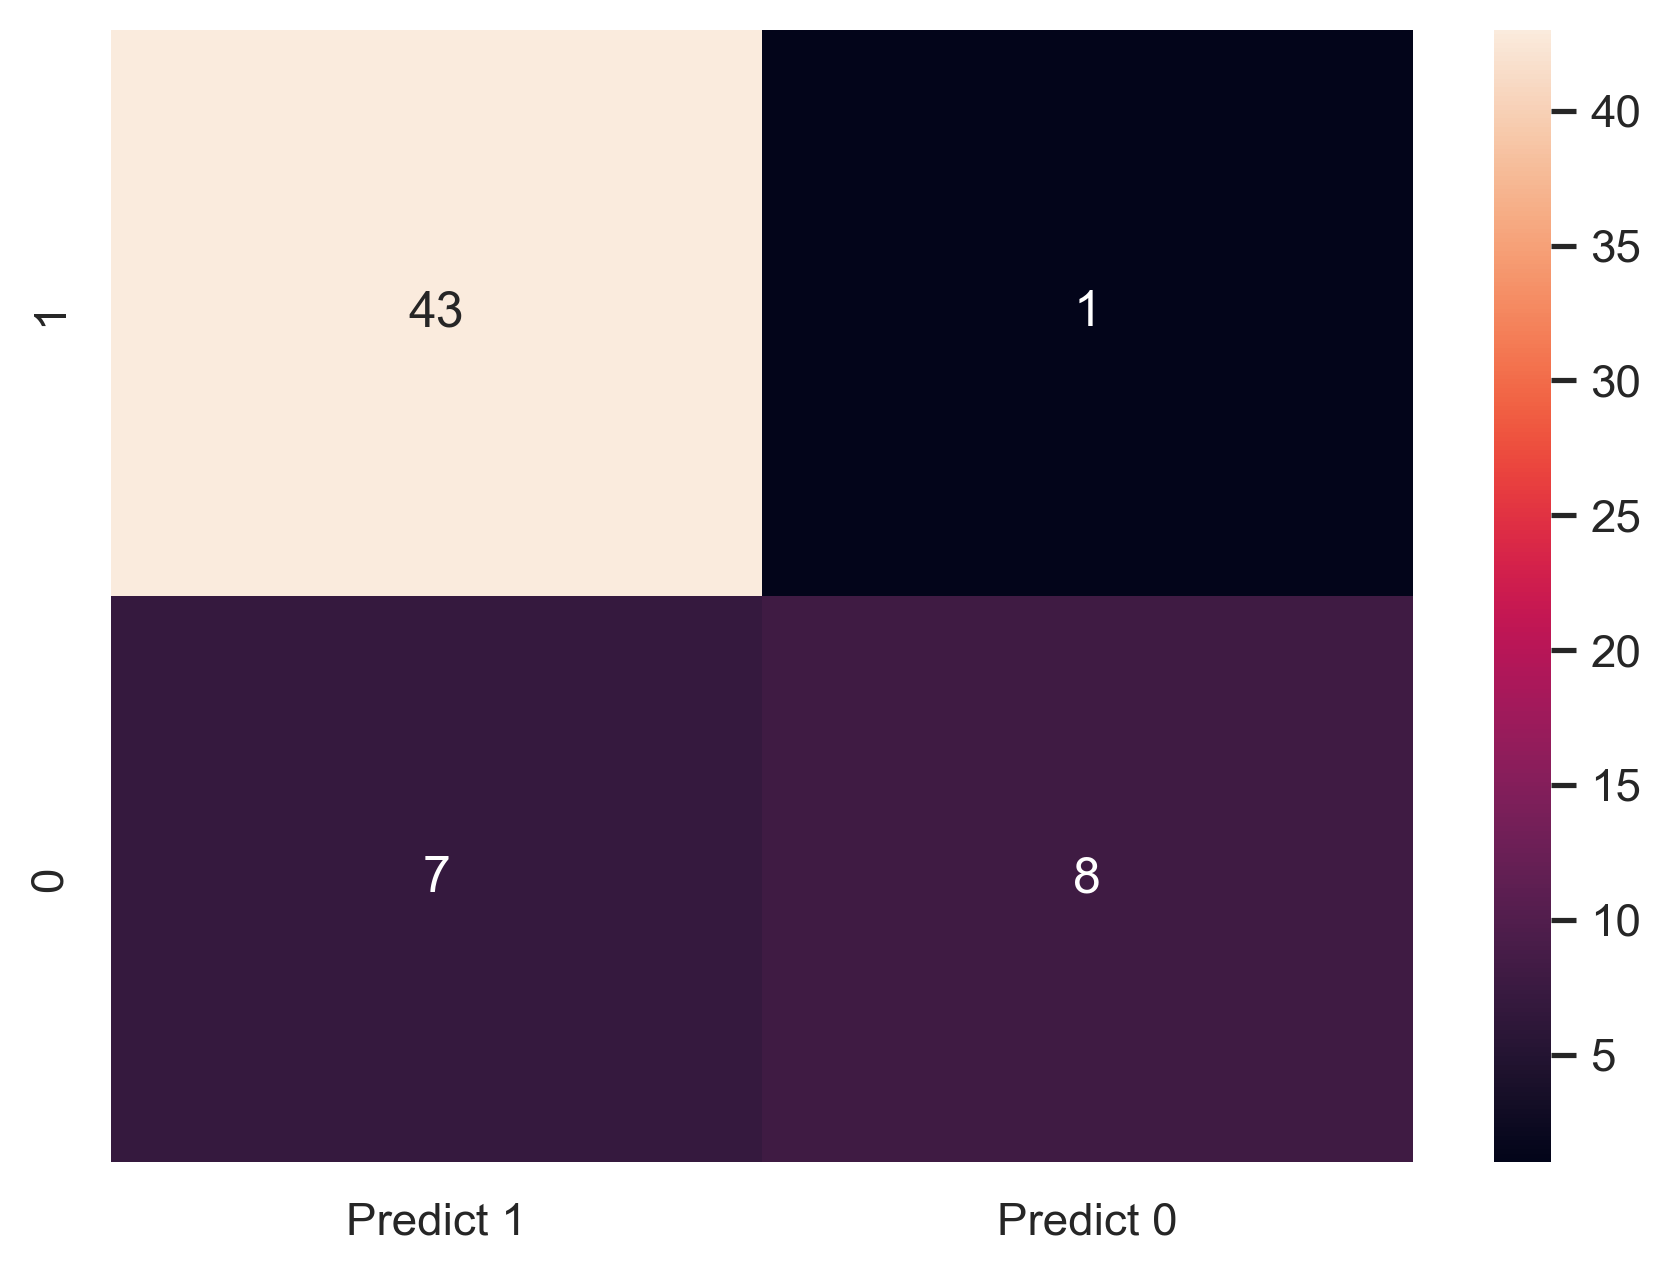

In [25]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Logistic regression model

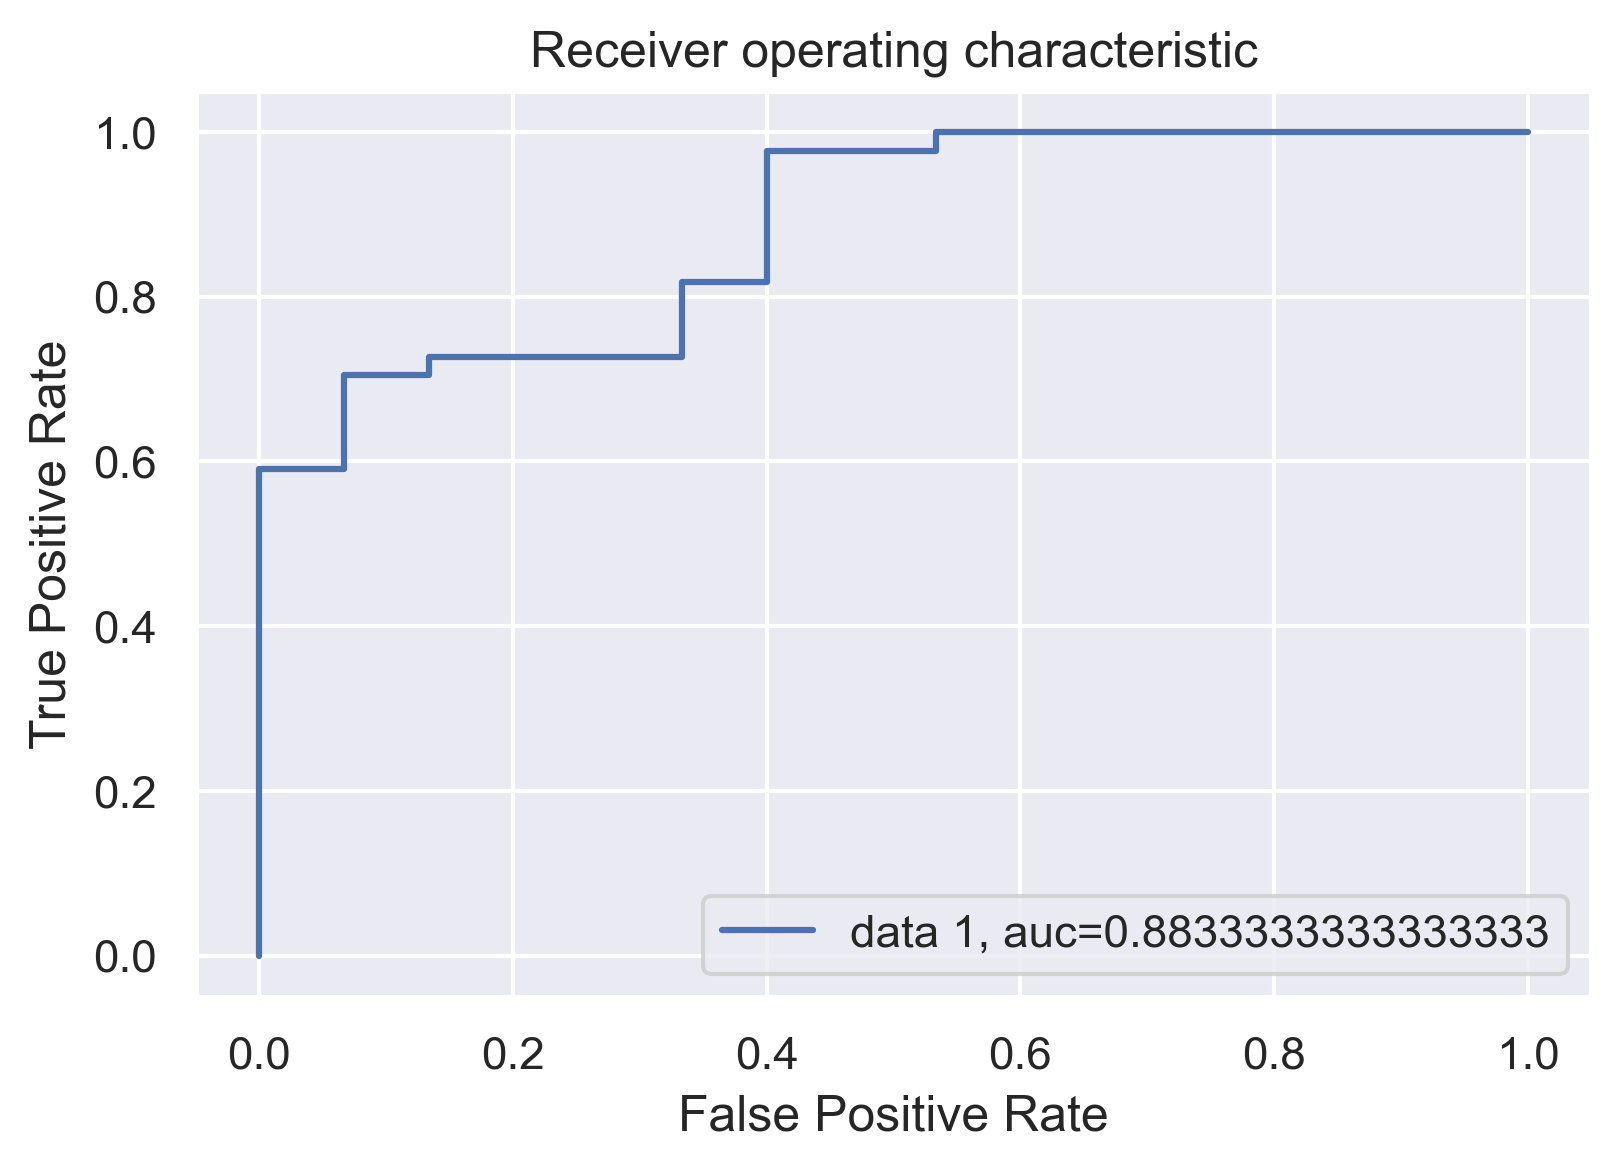

In [26]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Decision Tree Classifier

In [27]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.89      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.87      0.86      0.87        59

Accuracy: 0.864406779661017
Precision: 0.9285714285714286
Recall: 0.8863636363636364


In [28]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.864406779661017


**Observations:**
Seems Decision tree model overfitting. To avoid this we will limit the max depth.

In [29]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth=2)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59

Accuracy: 0.864406779661017
Precision: 0.86
Recall: 0.9772727272727273


In [30]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8602941176470589
0.864406779661017


**Observations:**
Now Model isn't overfitting, also not underfitting.

### Confusion matrix of DecisionTree model

<AxesSubplot:>

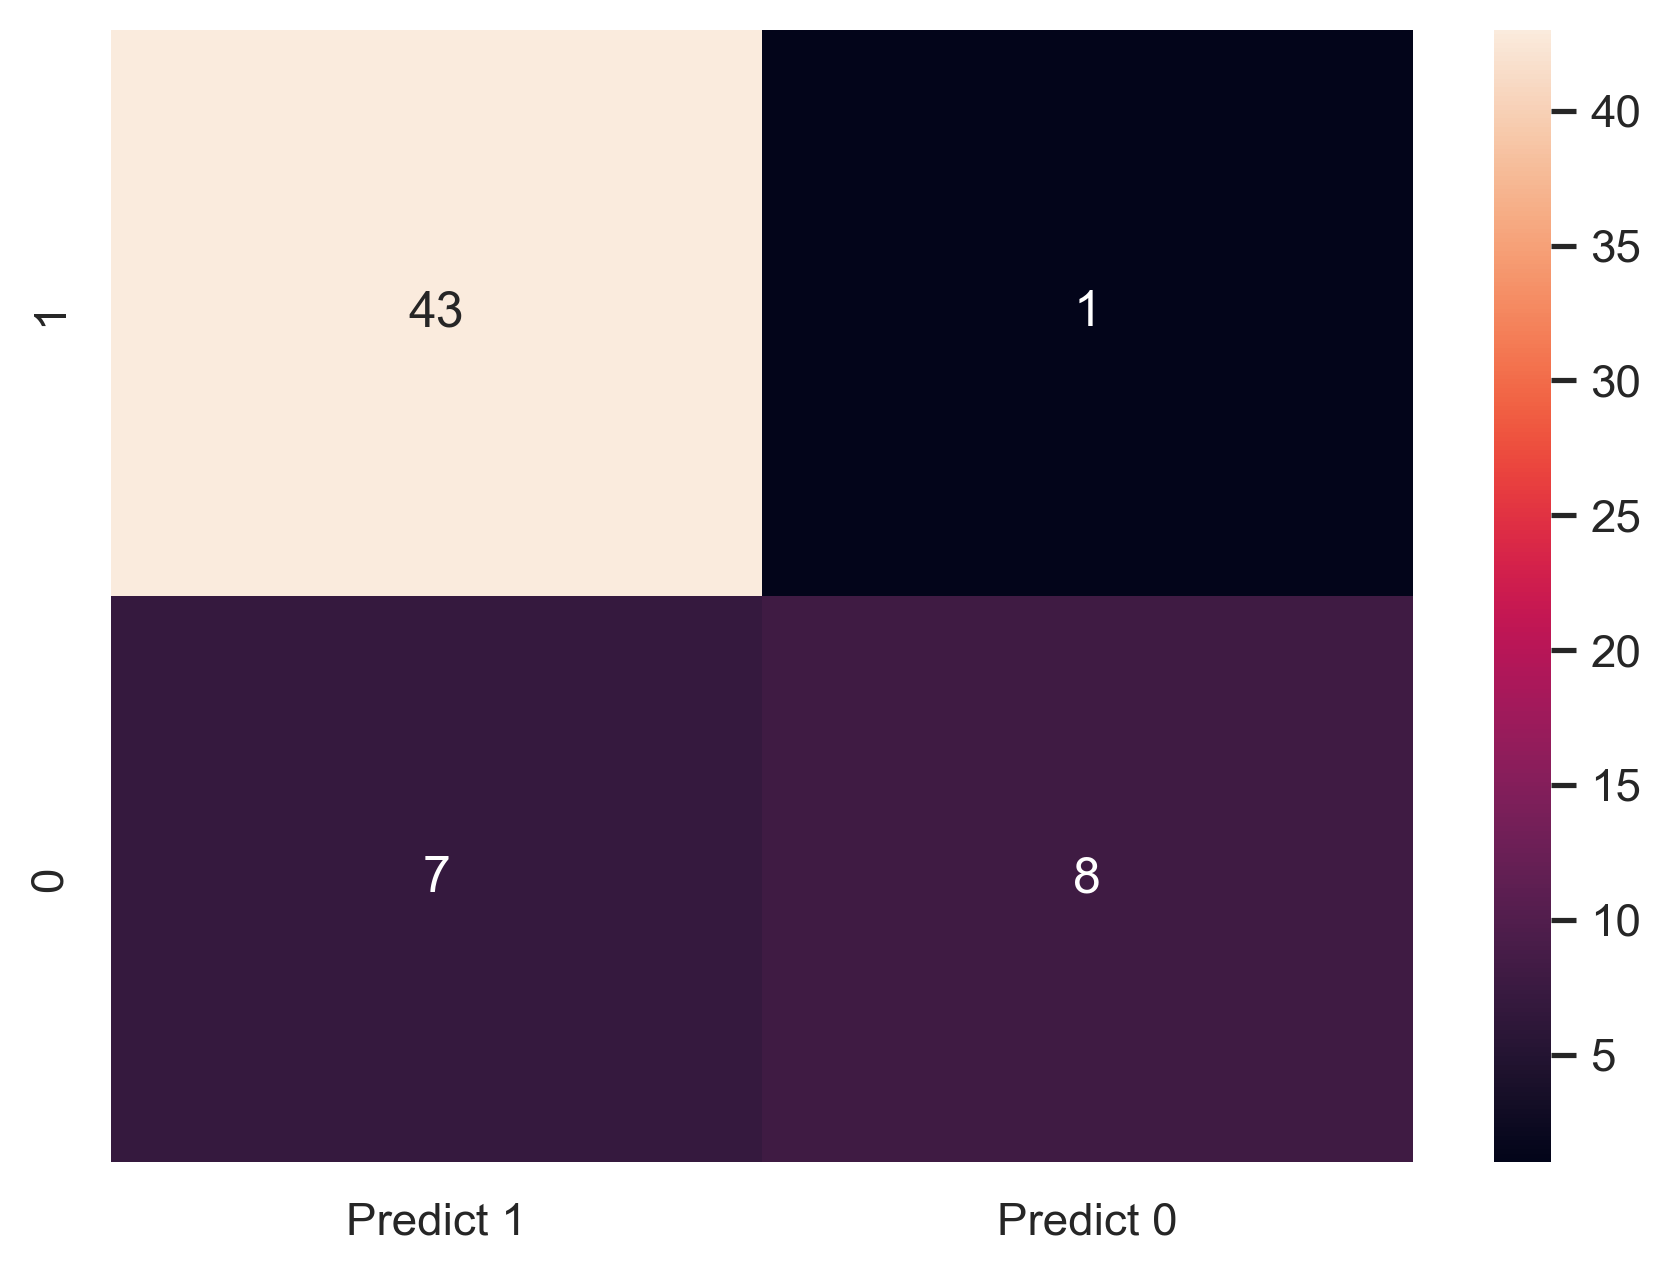

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred_dt, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of DecisionTree model

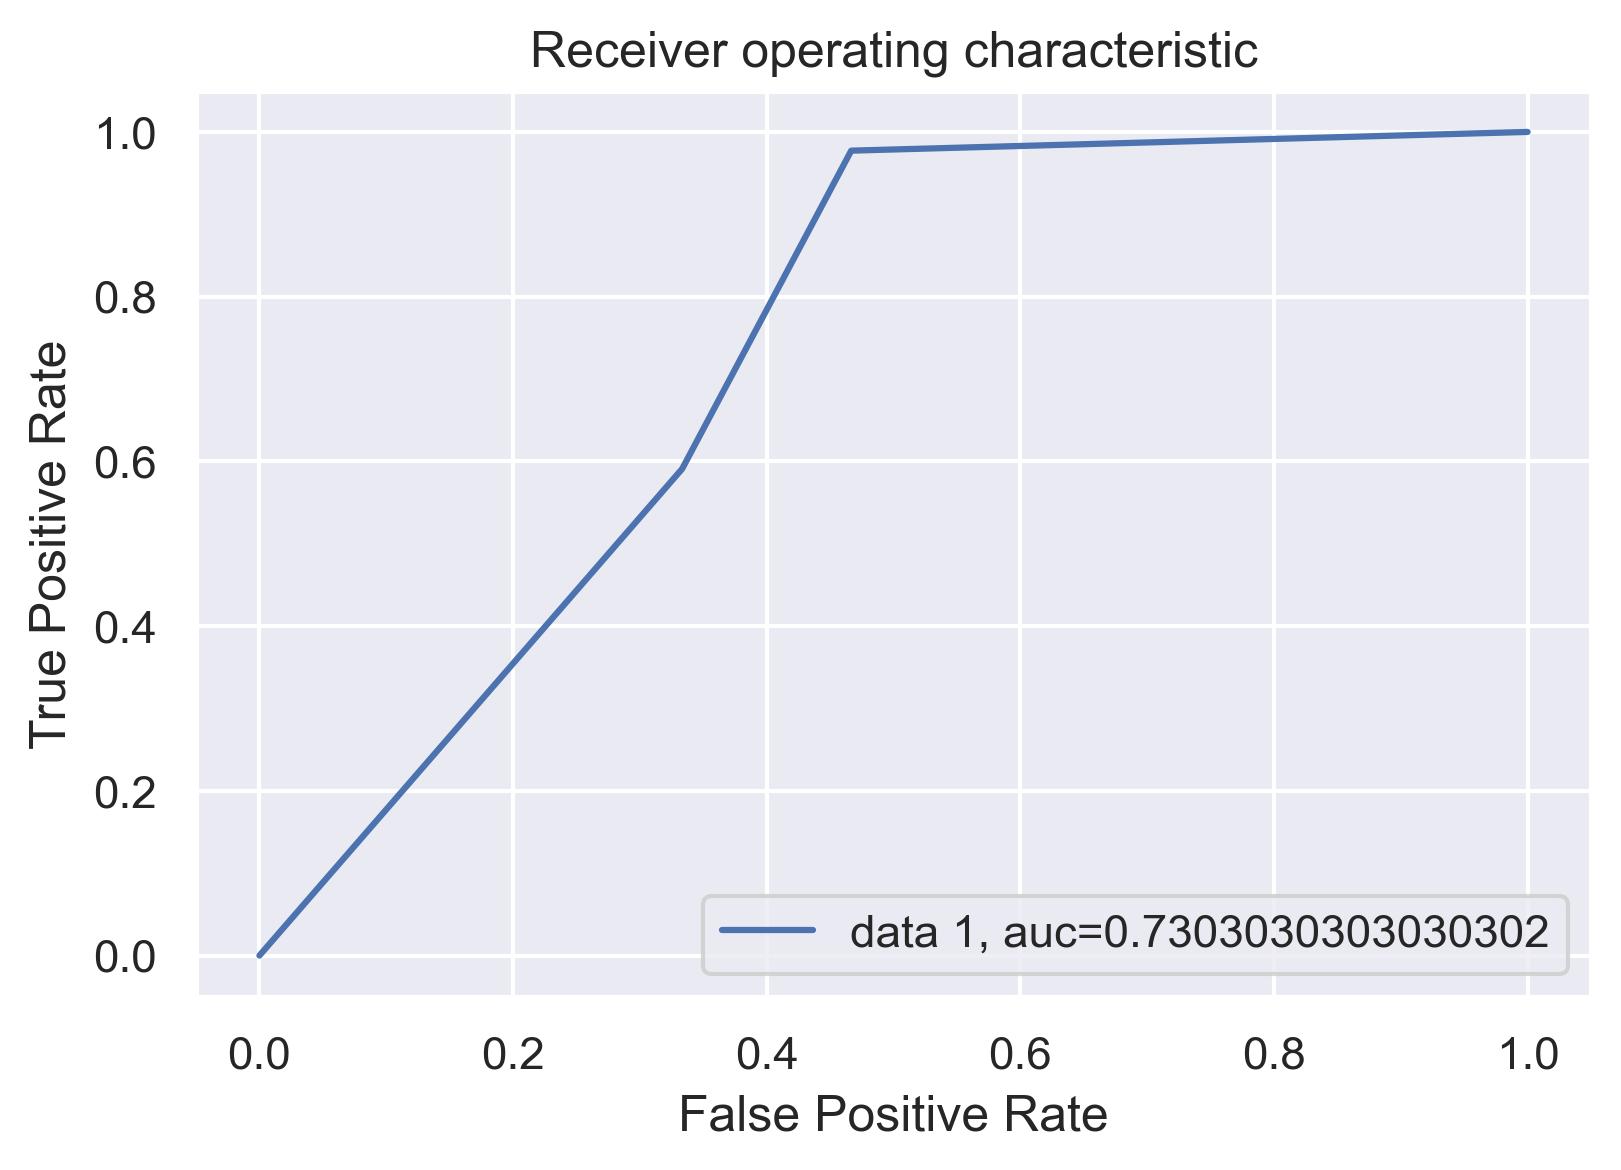

In [32]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Ensemble learning - Bagging

In [33]:
bgcl = BaggingClassifier(n_estimators = 100, base_estimator=dt, random_state=42)

bgcl = bgcl.fit(X_train, y_train)
y_pred_bgcl = bgcl.predict(X_test)

print(classification_report(y_test, y_pred_bgcl))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bgcl))
print("Precision:",metrics.precision_score(y_test, y_pred_bgcl))
print("Recall:",metrics.recall_score(y_test, y_pred_bgcl))

print("\n")
print(bgcl.score(X_train,y_train))
print(bgcl.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

Accuracy: 0.8813559322033898
Precision: 0.8775510204081632
Recall: 0.9772727272727273


0.9117647058823529
0.8813559322033898


**Observations:**
Model isn't overfitting as well as not underfitting.

### Confusion Matrix of Bagging Model

<AxesSubplot:>

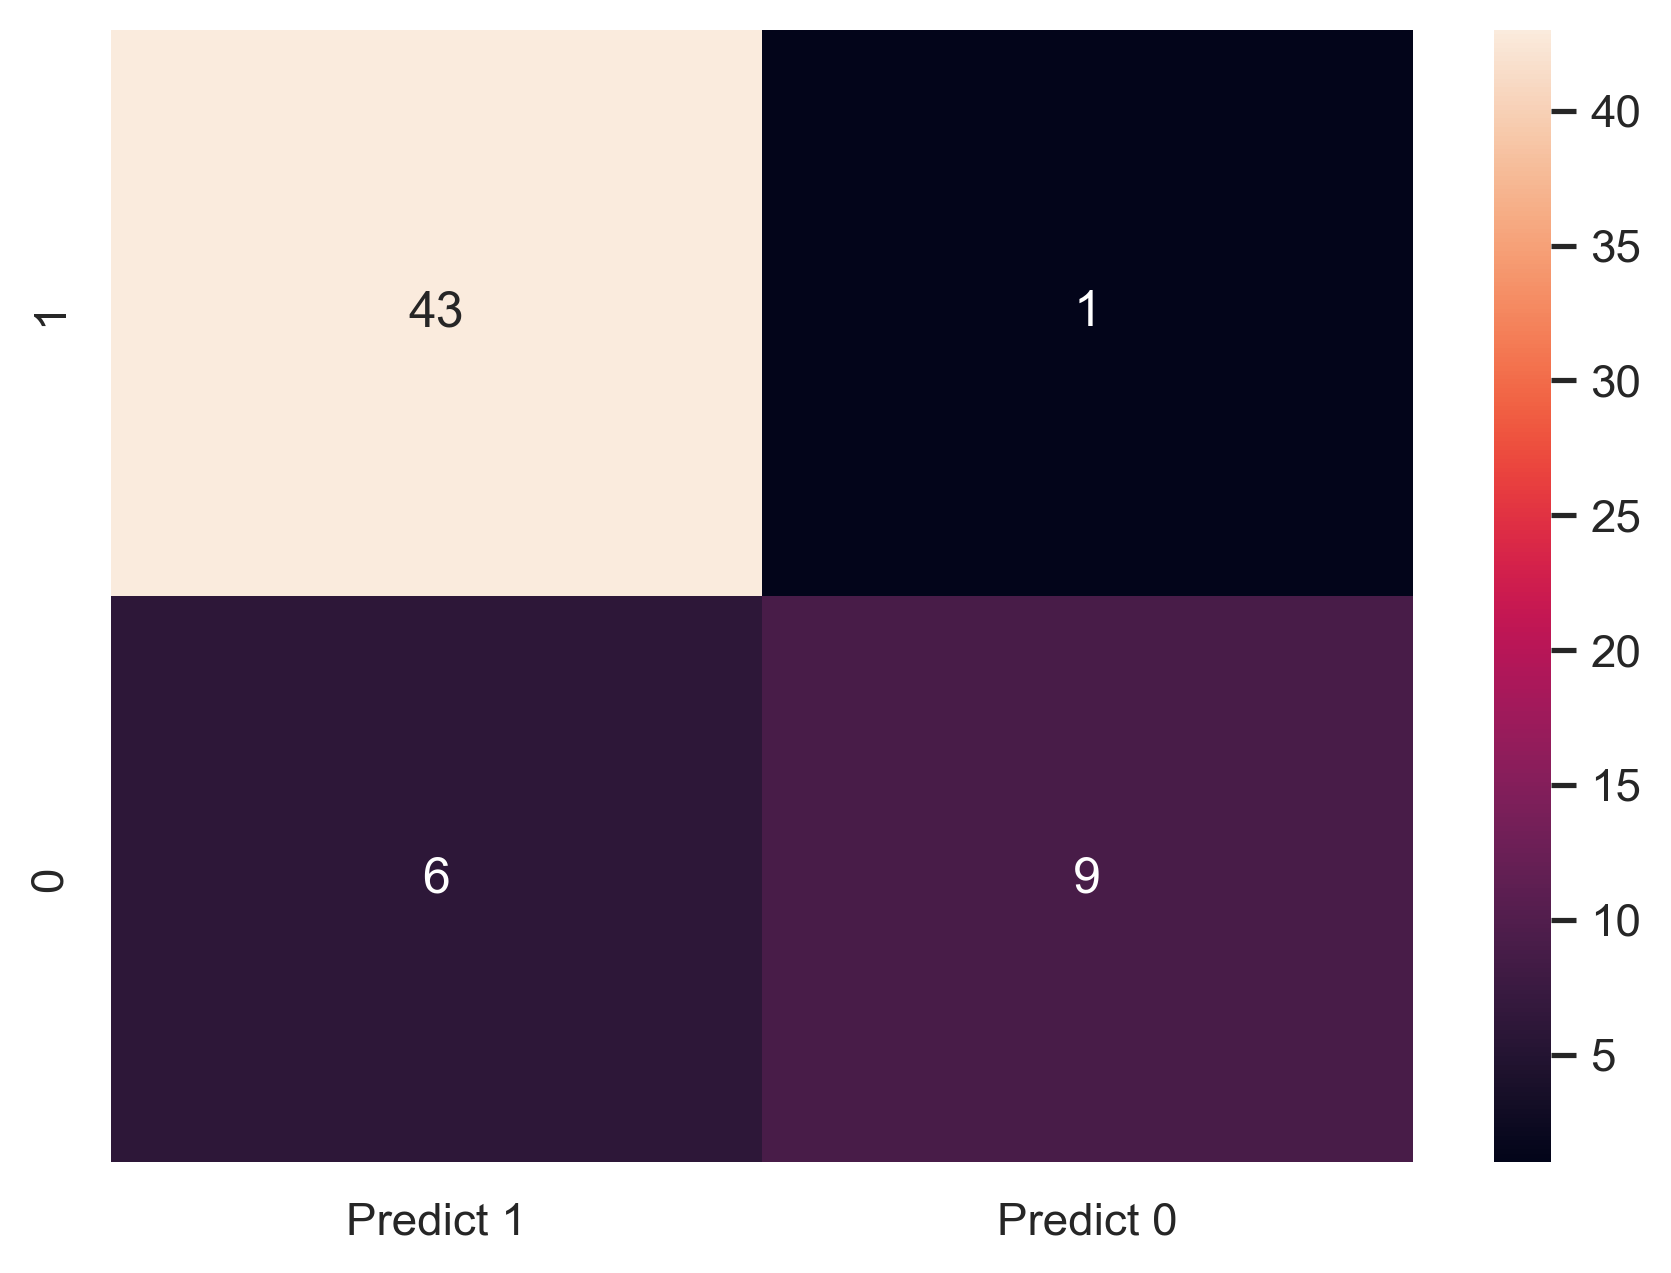

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred_bgcl, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Bagging Model

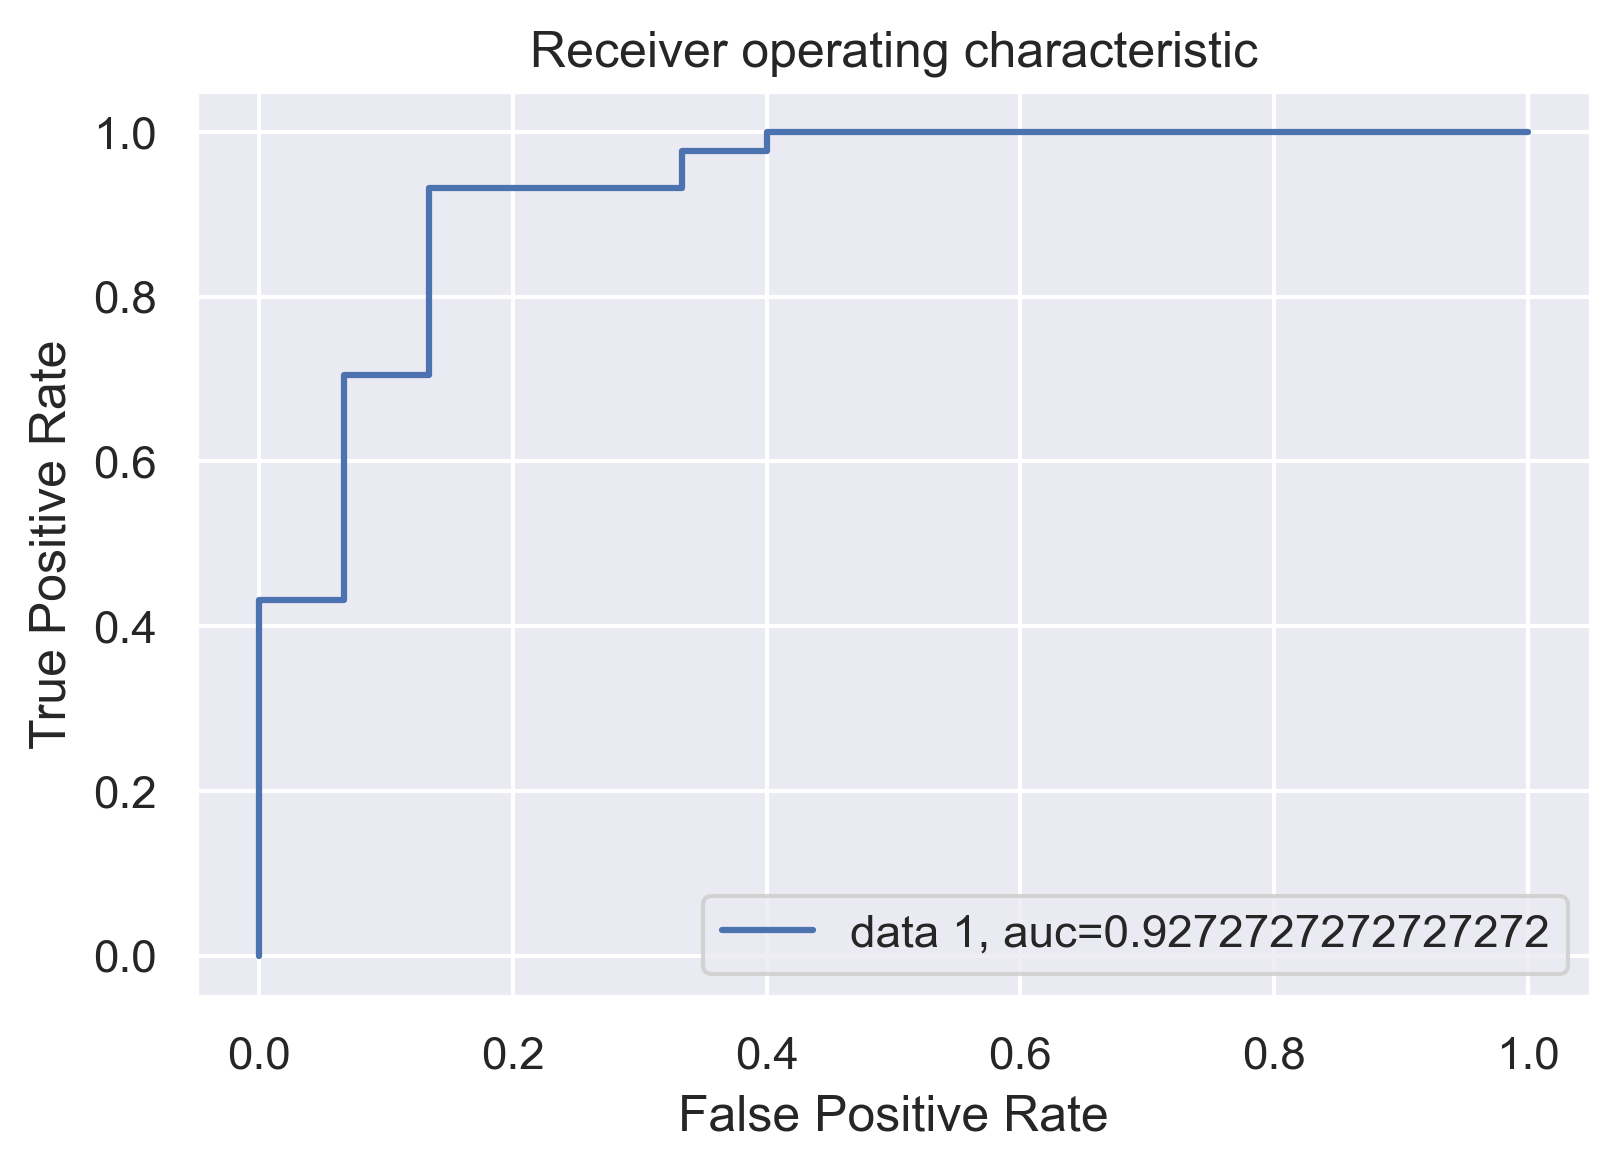

In [35]:
y_pred_proba = bgcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Ensemble learning - AdaBoosting

In [36]:
abcl = AdaBoostClassifier(n_estimators=45, random_state=42)
abcl = abcl.fit(X_train, y_train)
y_pred_ada = abcl.predict(X_test)

print(classification_report(y_test, y_pred_ada))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("Precision:",metrics.precision_score(y_test, y_pred_ada))
print("Recall:",metrics.recall_score(y_test, y_pred_ada))

print("\n")
print(abcl.score(X_train,y_train))
print(abcl.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

Accuracy: 0.8983050847457628
Precision: 0.8958333333333334
Recall: 0.9772727272727273


1.0
0.8983050847457628


**Observations:**
***Model is overfitting.***

### Confusion Matrix AdaBoosting model

<AxesSubplot:>

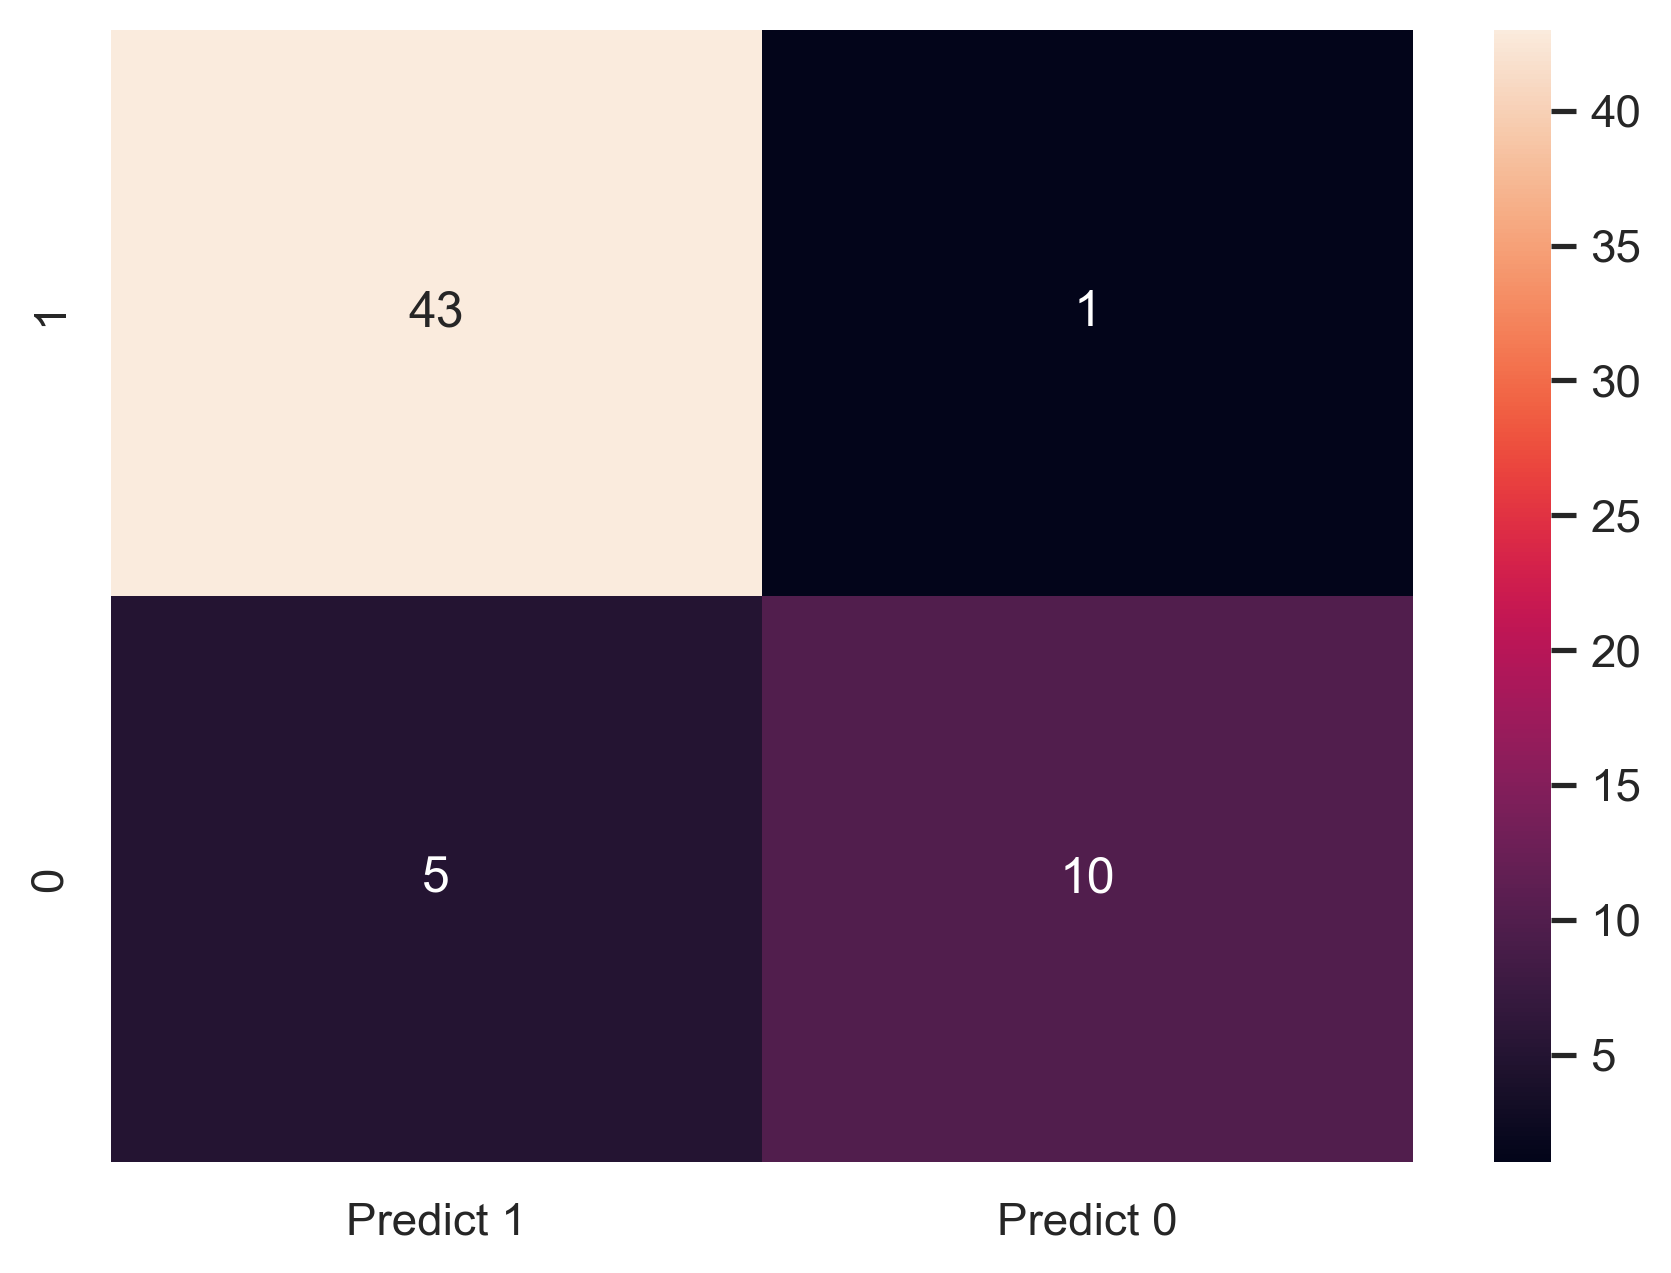

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred_ada, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Adaboosting model

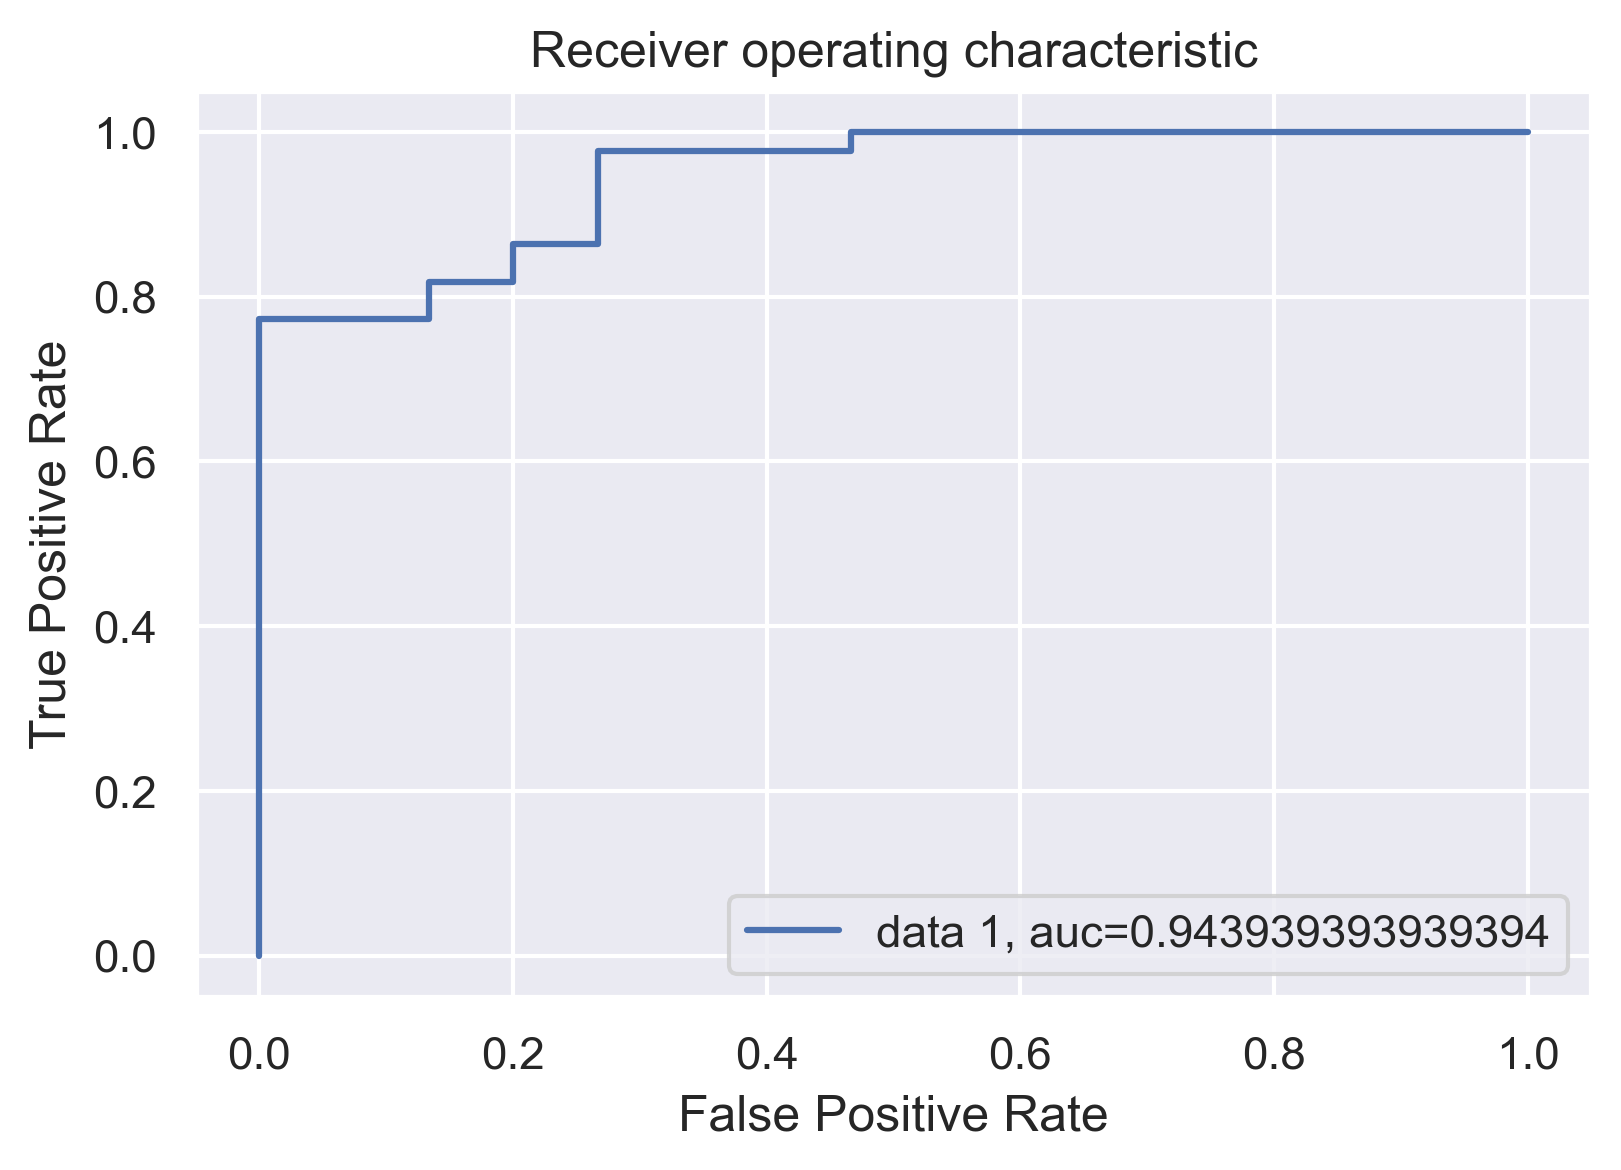

In [38]:
y_pred_proba = abcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Random forest classifier

In [39]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

Accuracy: 0.9322033898305084
Precision: 0.9347826086956522
Recall: 0.9772727272727273
1.0
0.9322033898305084


**Observations:**
Model is overfitting. So we will limit the max depth of Random Forest Classifier.

In [40]:
rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=2)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

Accuracy: 0.8813559322033898
Precision: 0.8775510204081632
Recall: 0.9772727272727273
0.8676470588235294
0.8813559322033898


**Observations:**
Now Model isn't overfitting, also not underfitting.

### Confusion matrix of Random Forest Classifier Model

<AxesSubplot:>

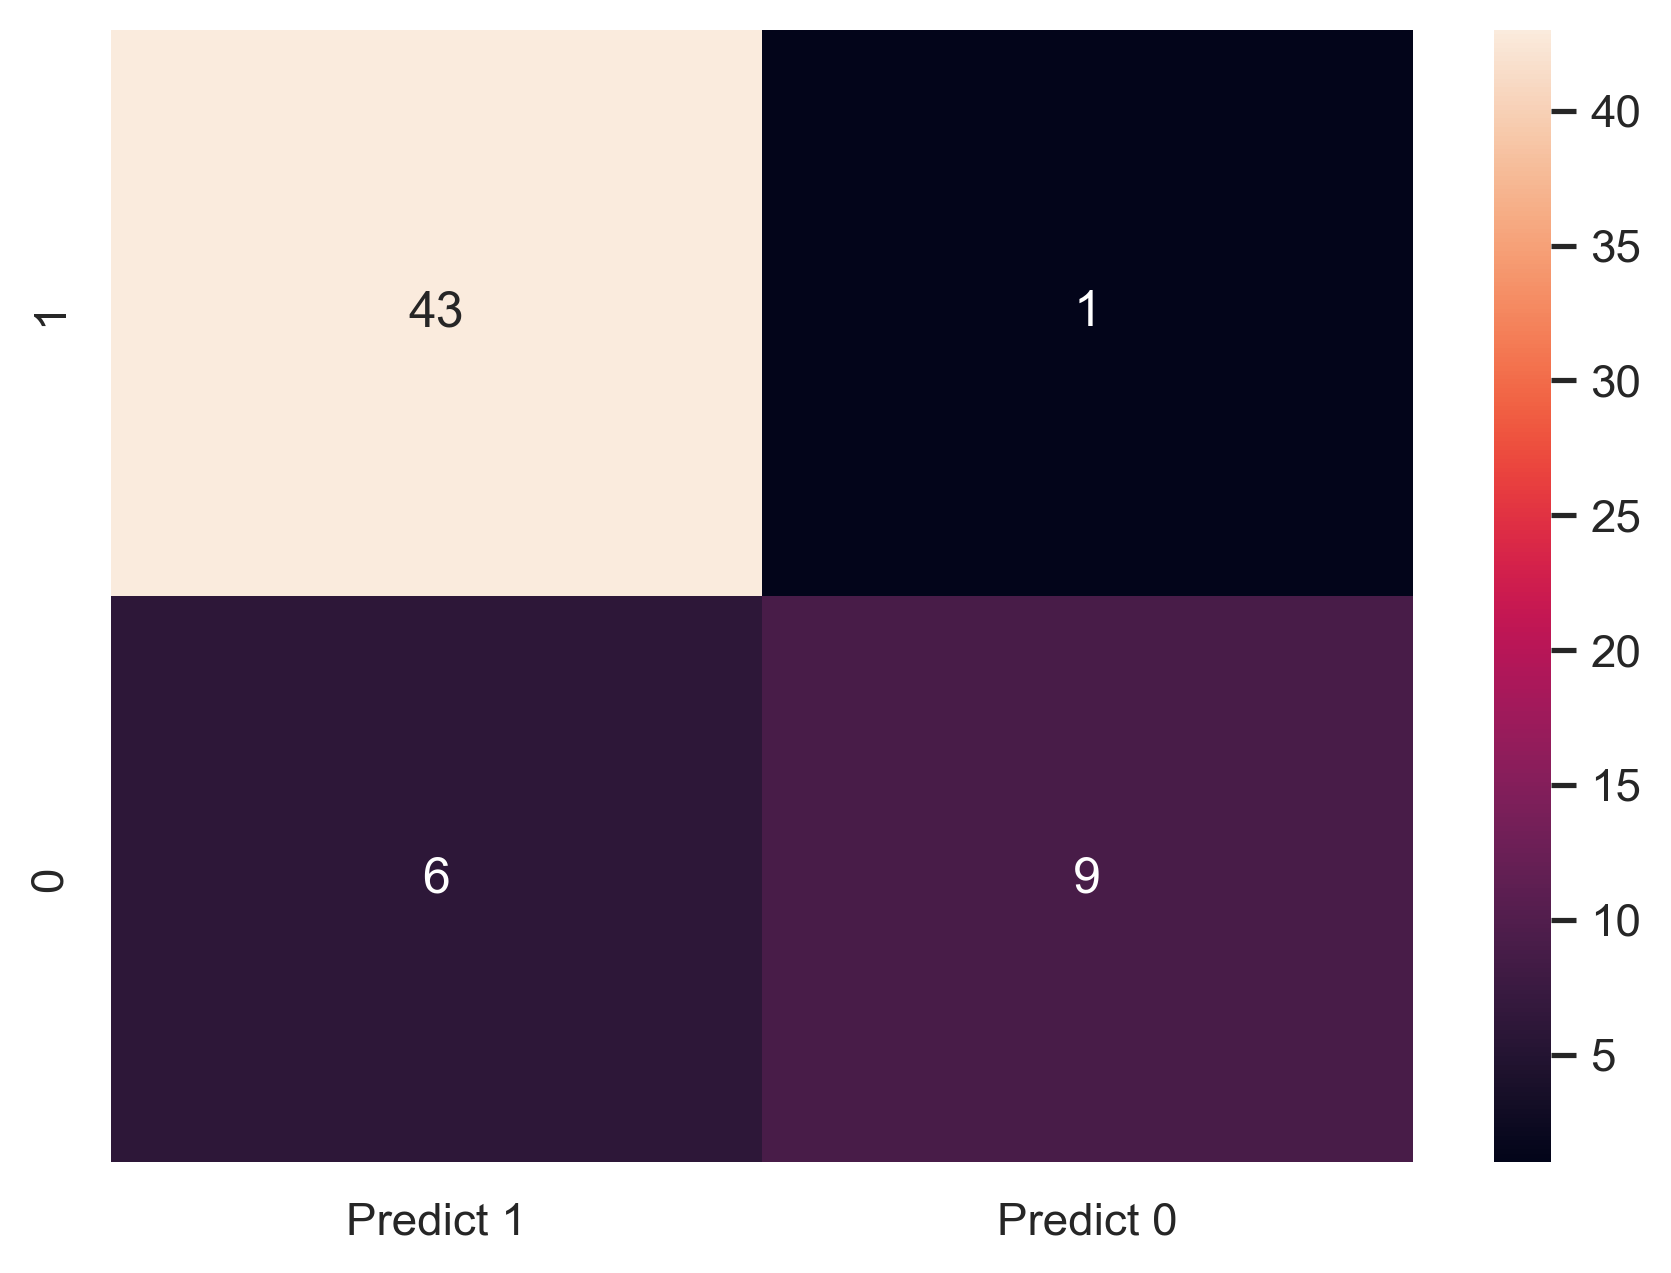

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Random Forest Classifier Model

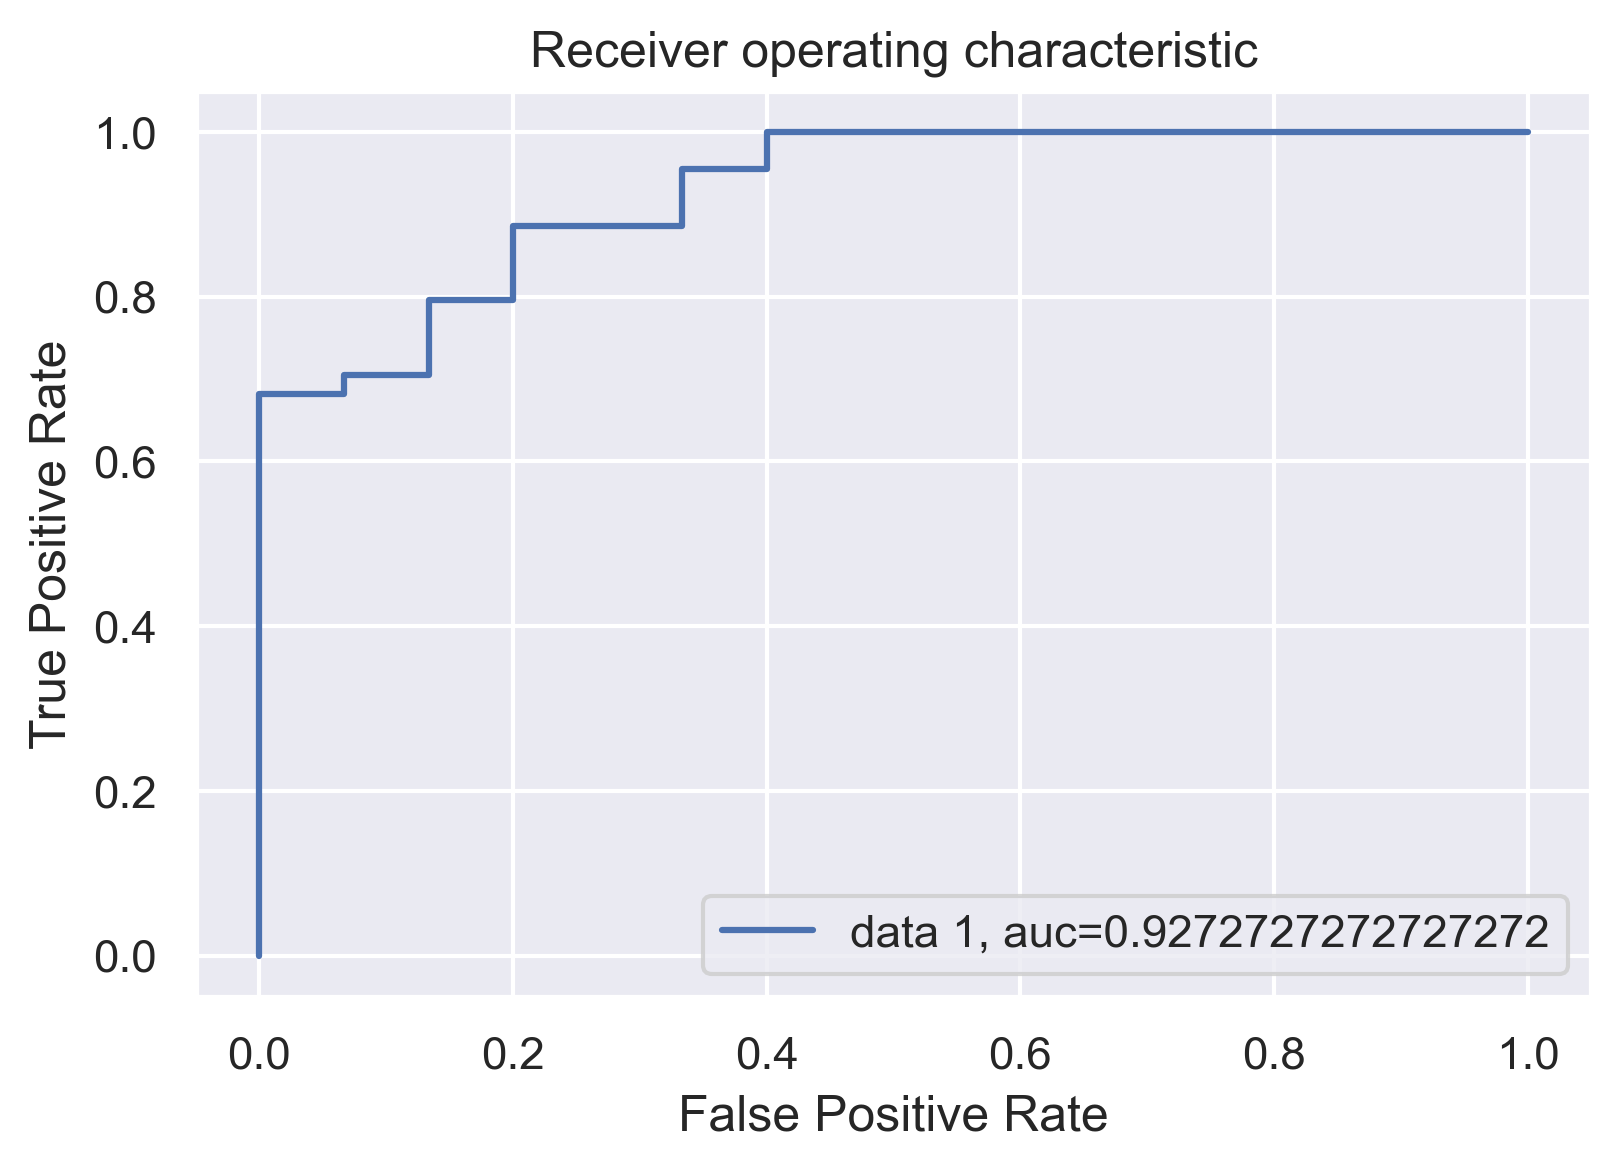

In [42]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## kNN

In [43]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9338235294117647
0.9152542372881356


**Observations:**
Model isn't overfitting as well as not underfitting.

In [44]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59



### Confusion matrix of kNN

<AxesSubplot:>

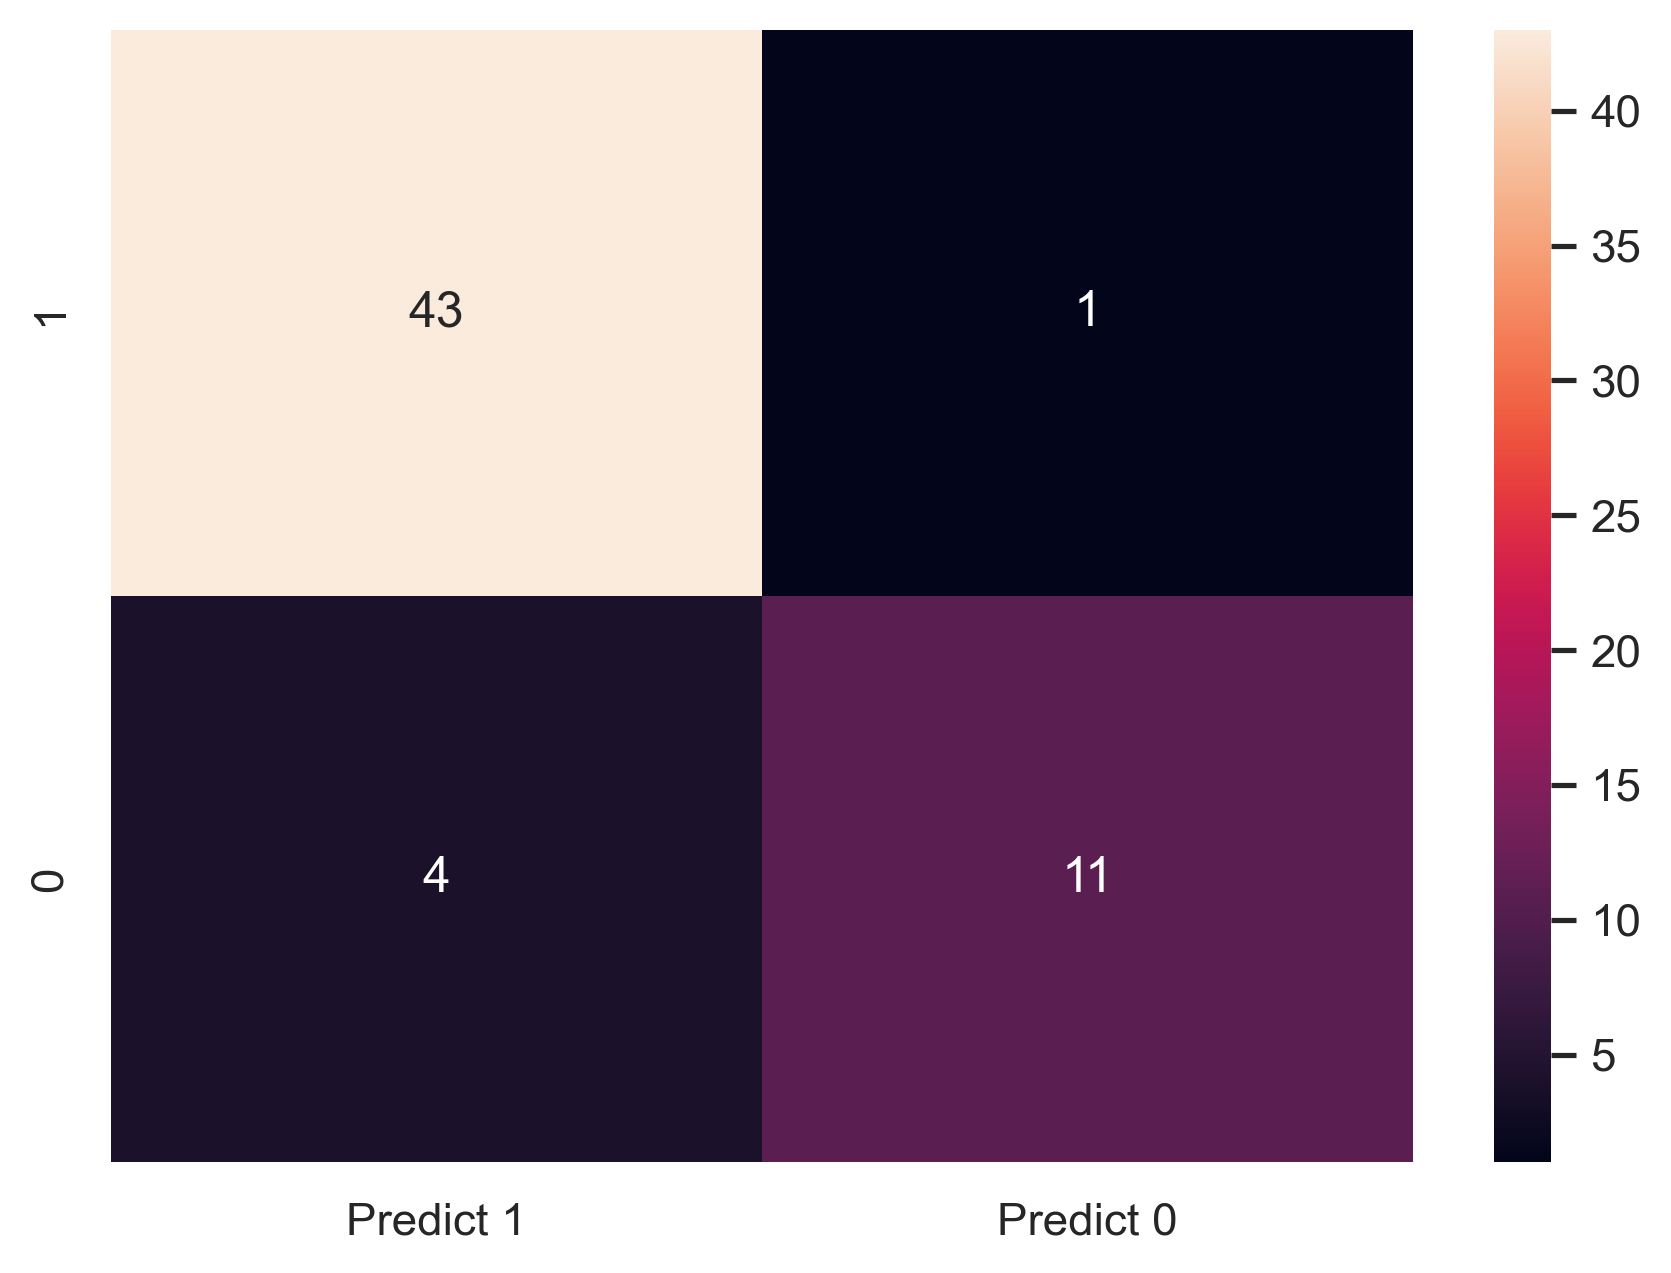

In [45]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of kNN

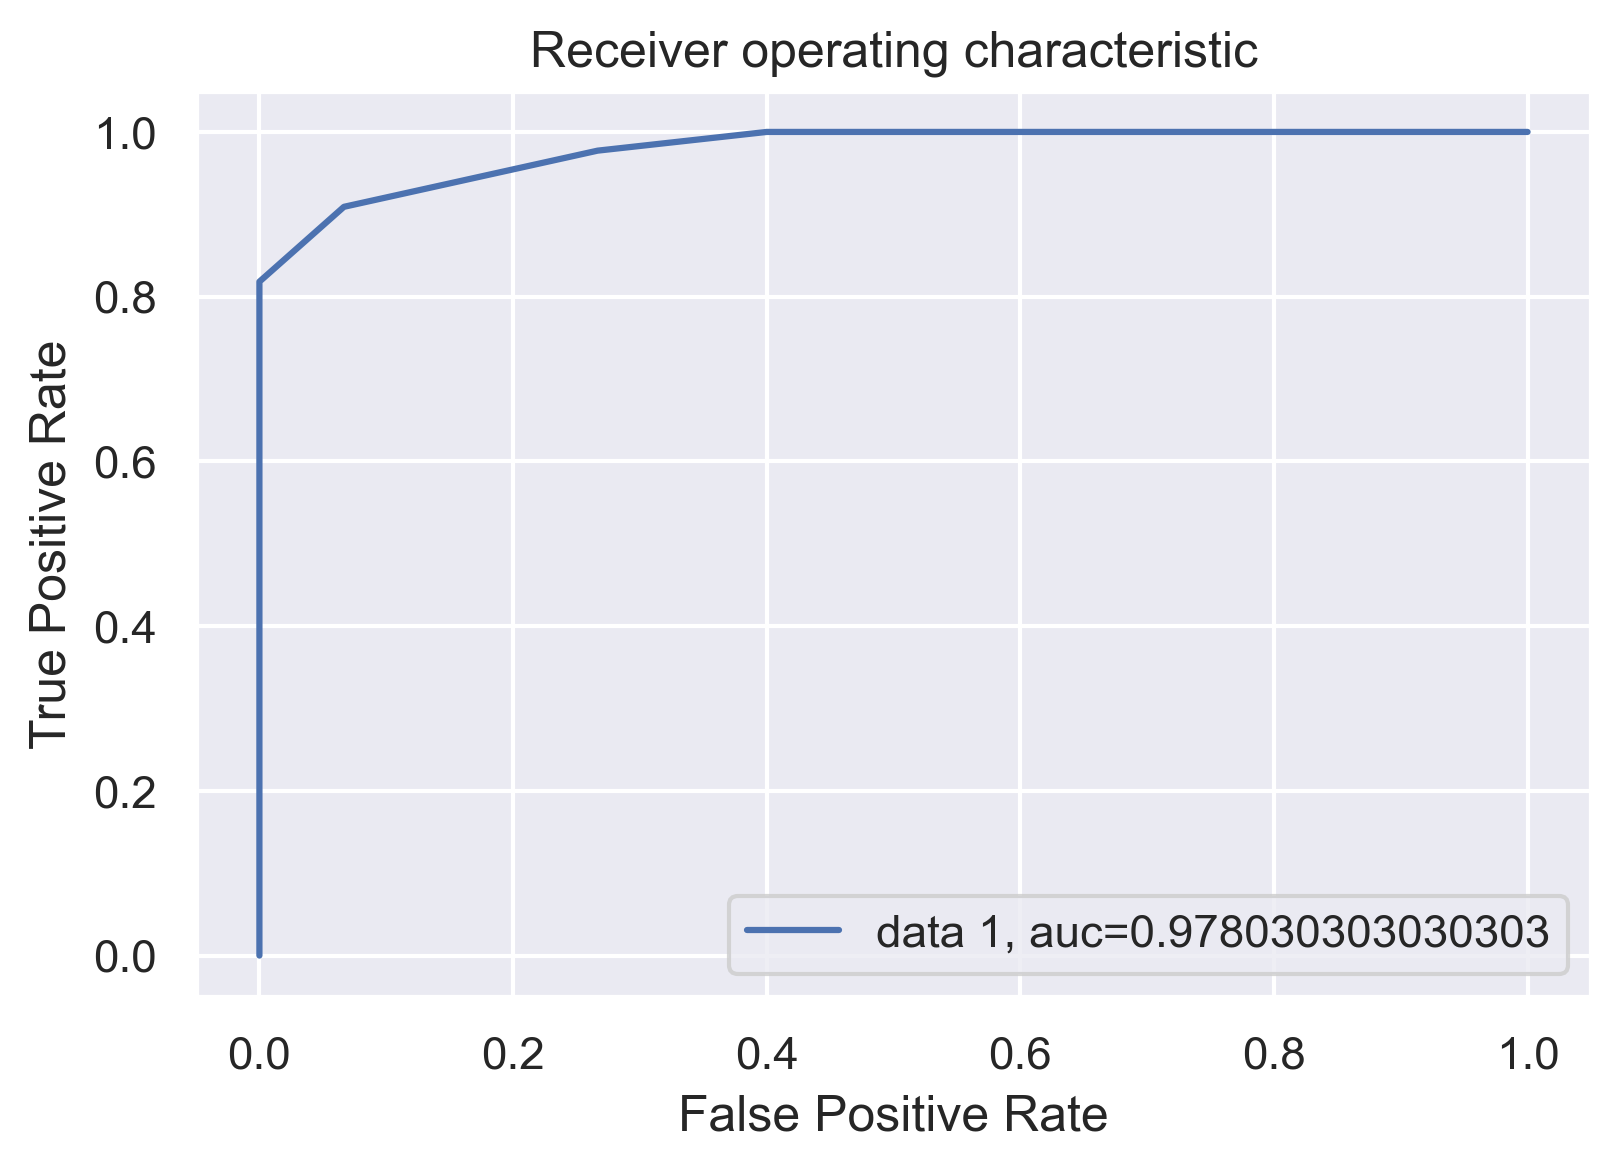

In [46]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## SVM

In [47]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=5, probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.8529411764705882
0.864406779661017


**Observations:**
Model isn't overfitting as well as not underfitting.

In [48]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.85      1.00      0.92        44

    accuracy                           0.86        59
   macro avg       0.92      0.73      0.78        59
weighted avg       0.89      0.86      0.85        59



### Confusion Matrix of SVM

<AxesSubplot:>

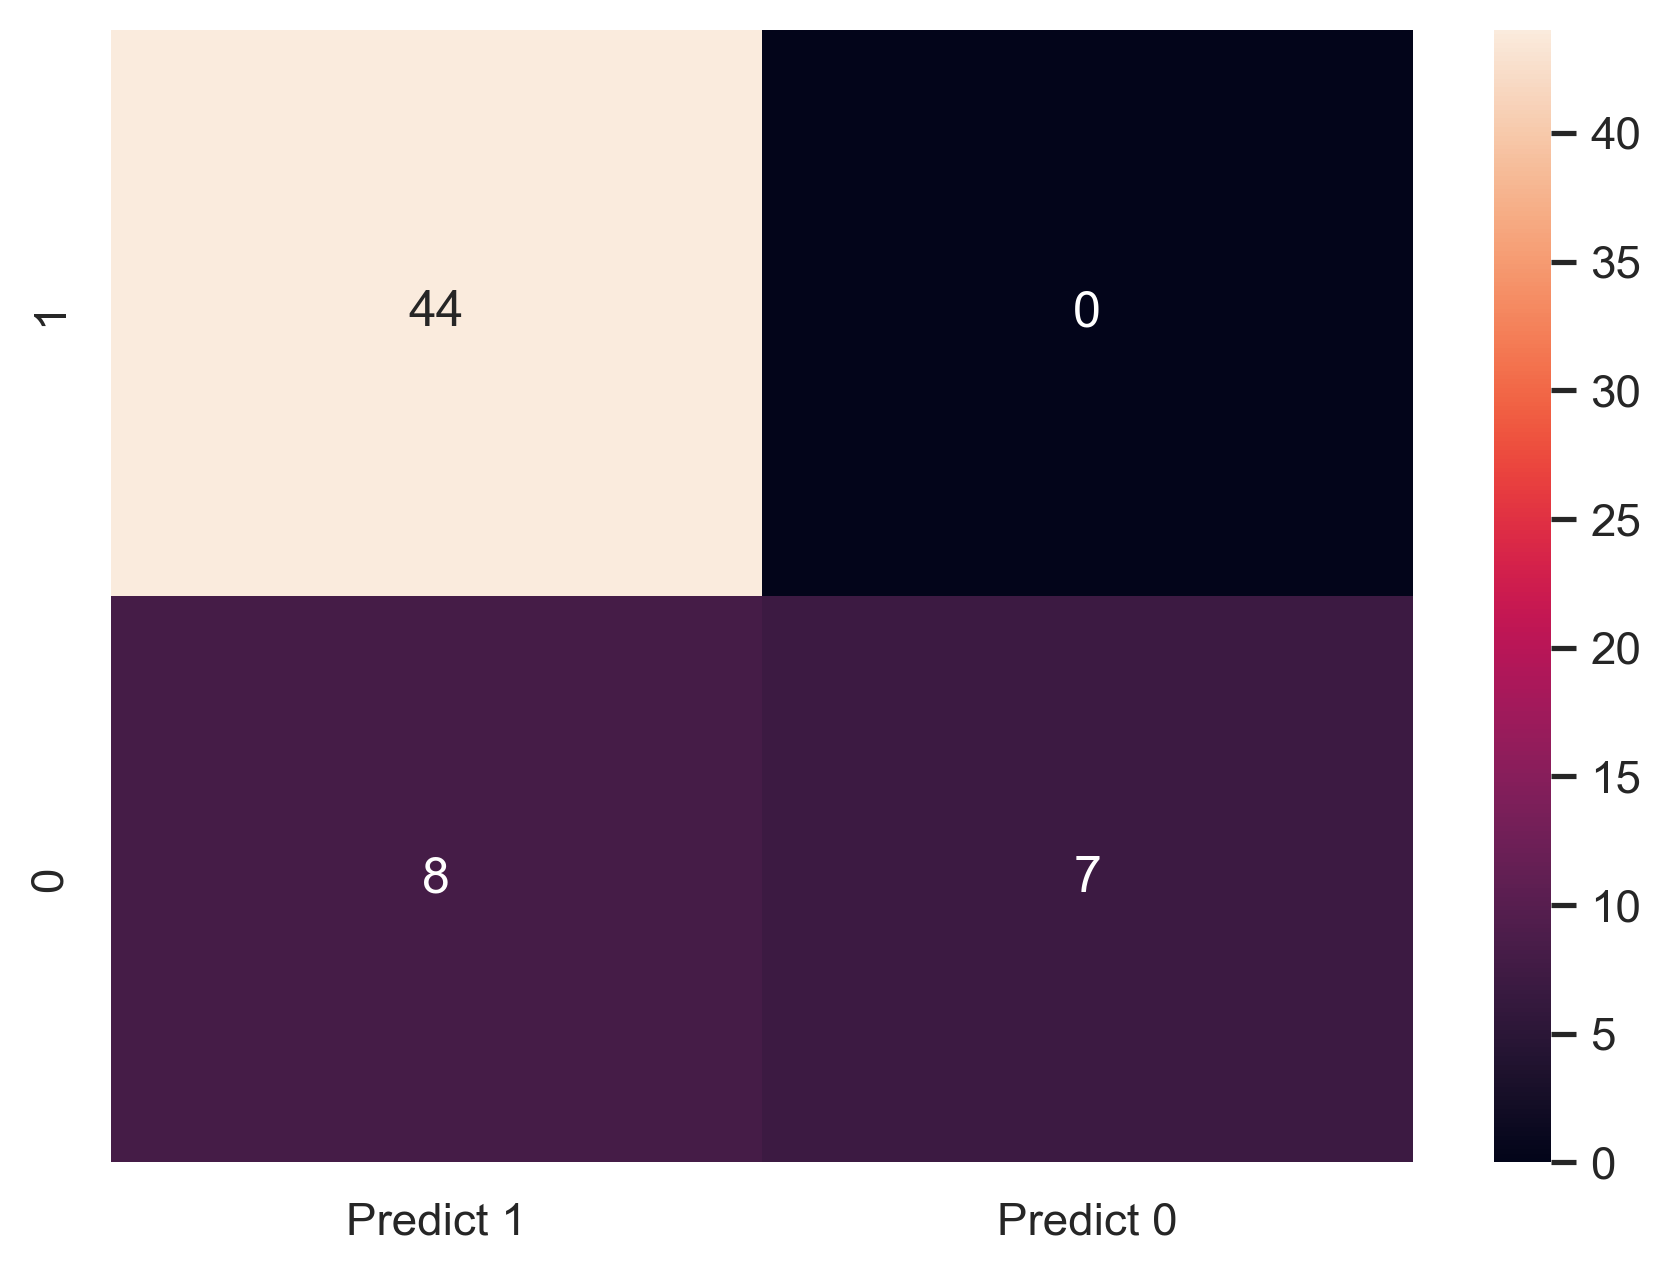

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of SVM

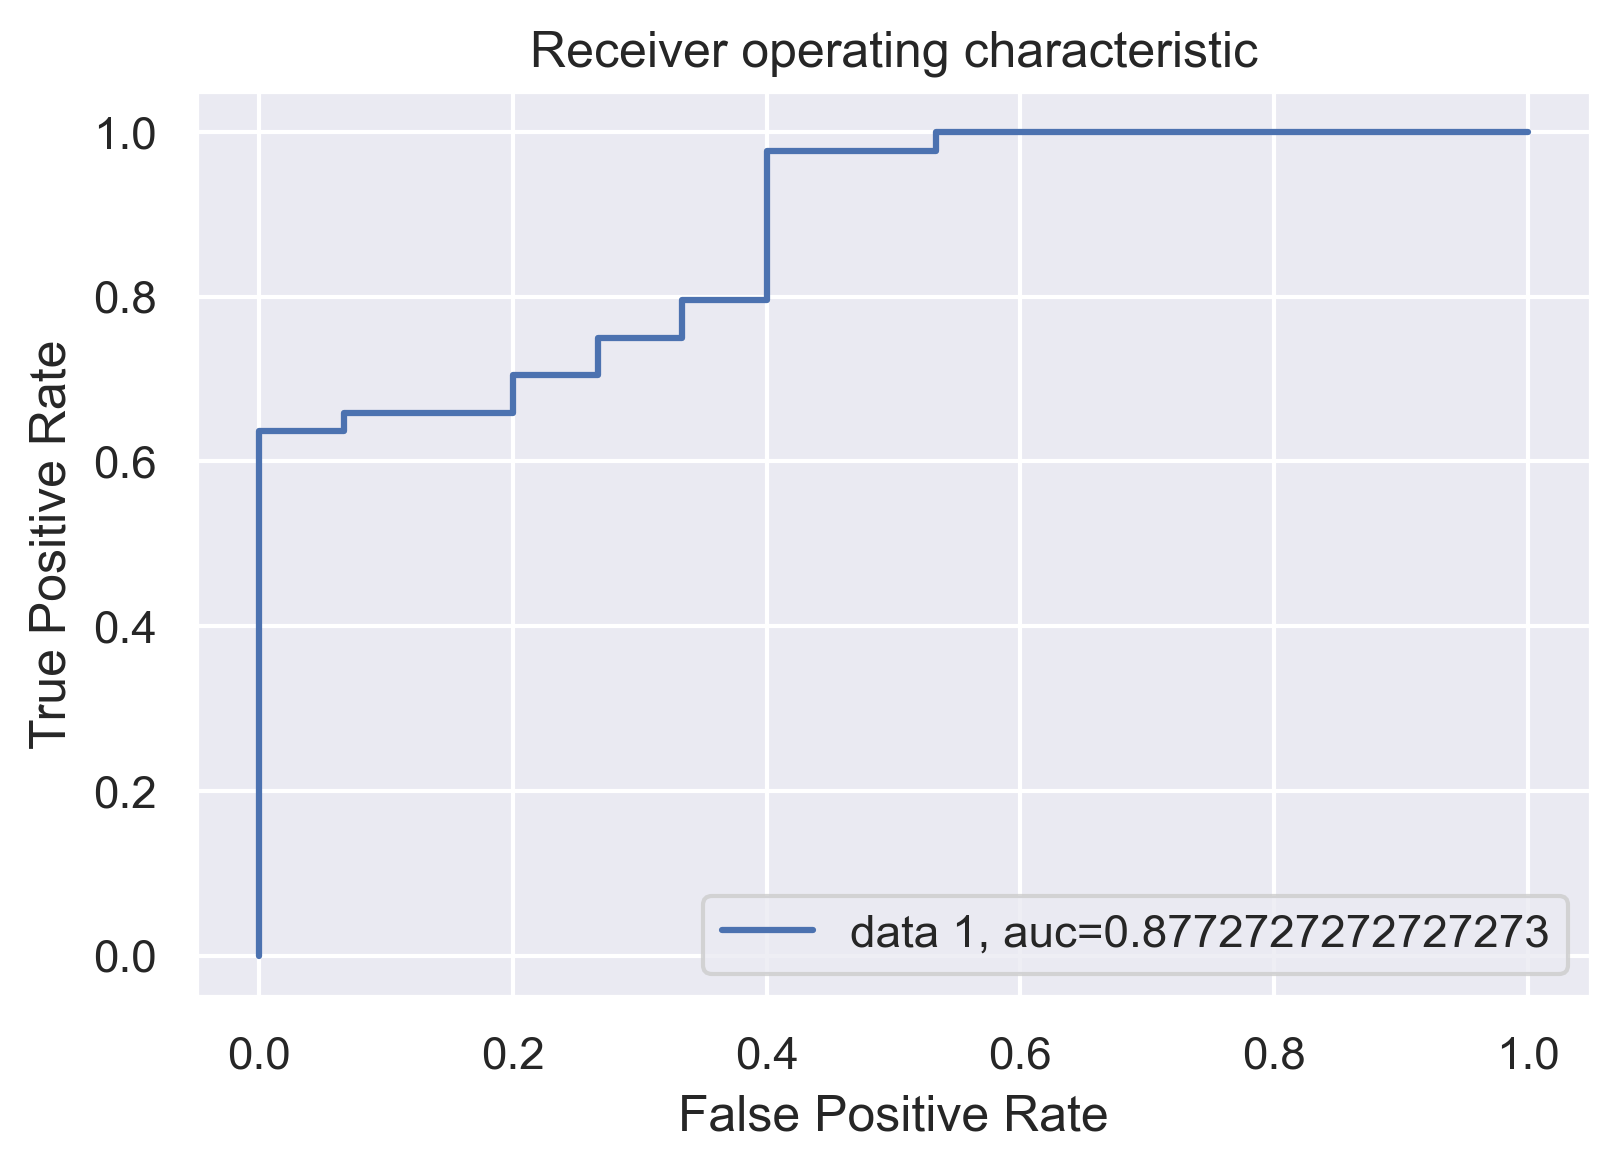

In [50]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## XGBoost Model

In [51]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall:",metrics.recall_score(y_test, y_pred_xgb))

print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

[09:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59

Accuracy: 0.9152542372881356
Precision: 0.8979591836734694
Recall: 1.0
1.0
0.9152542372881356


**Observations:**
Model isn't overfitting as well as not underfitting.

### Confusion Matrix of XGBoost

<AxesSubplot:>

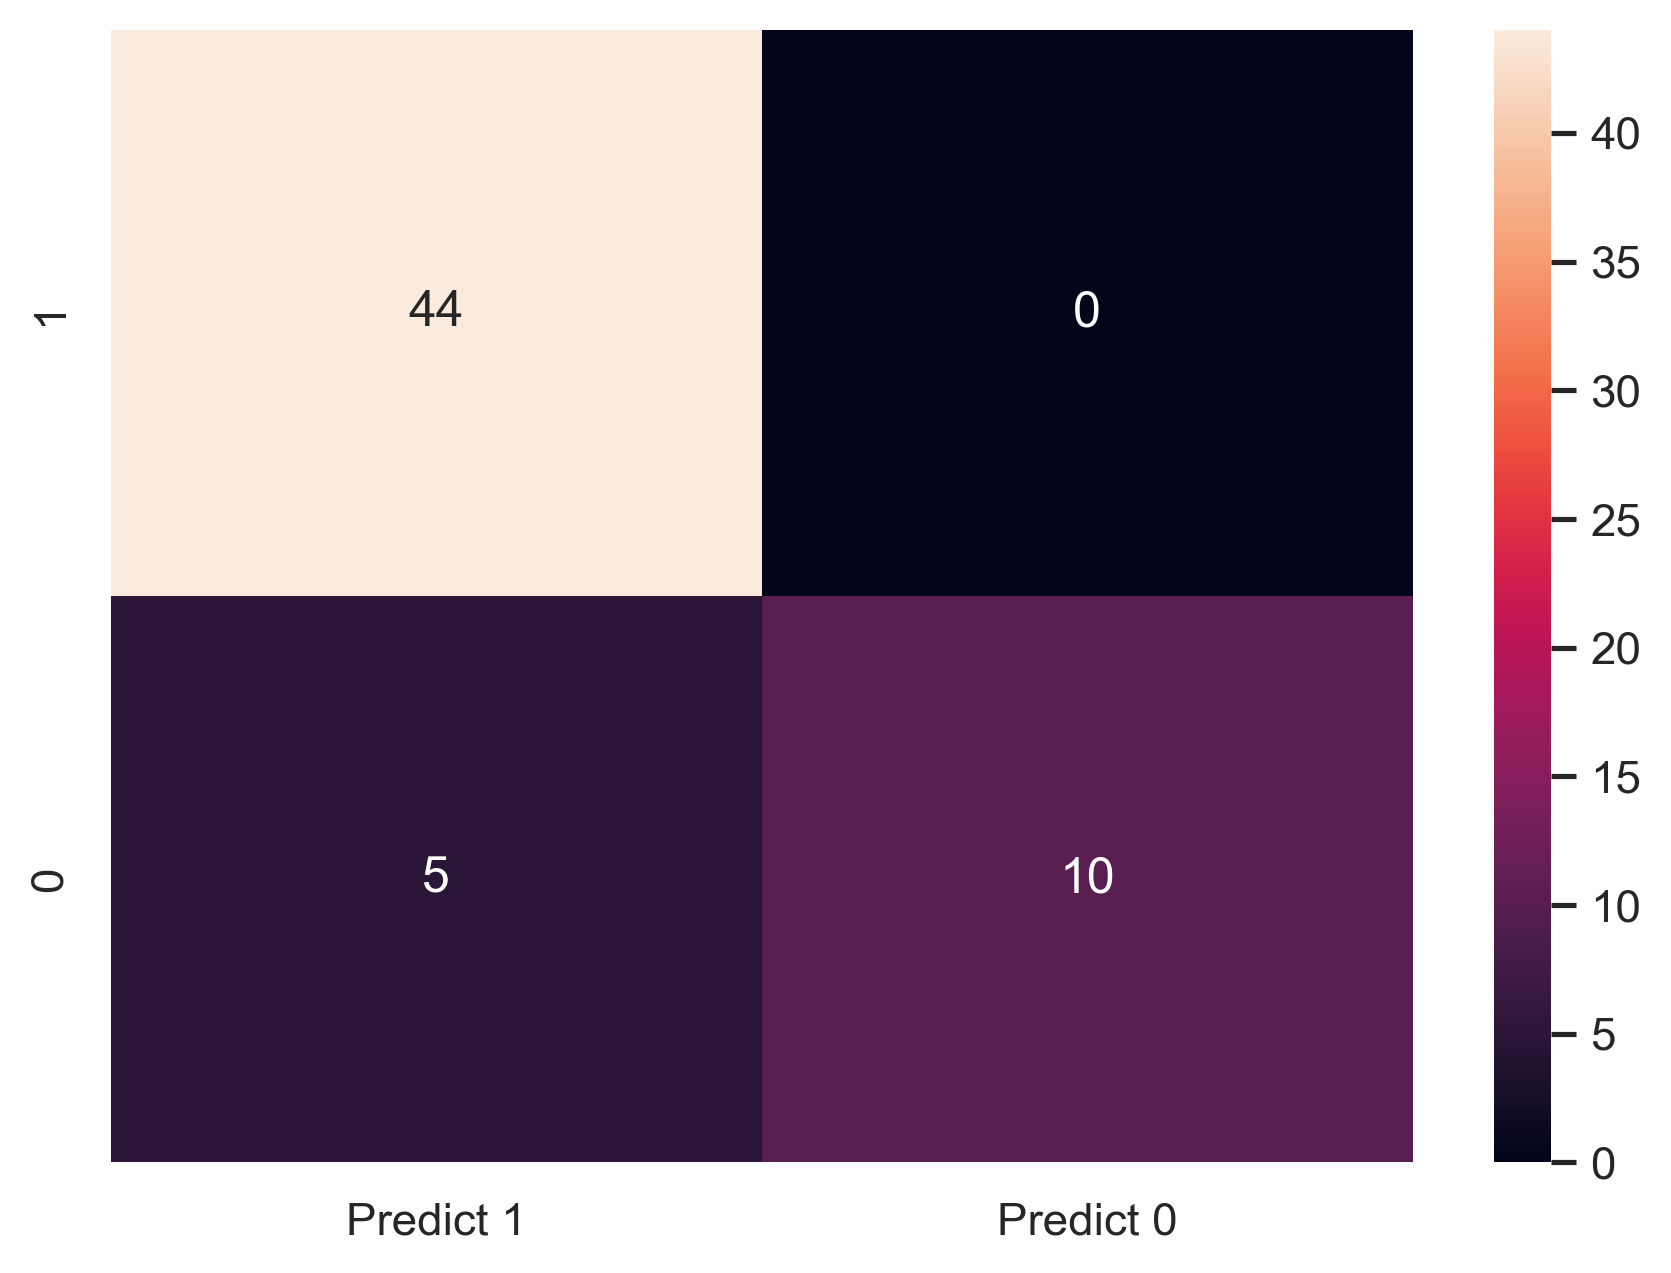

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of XGBoost

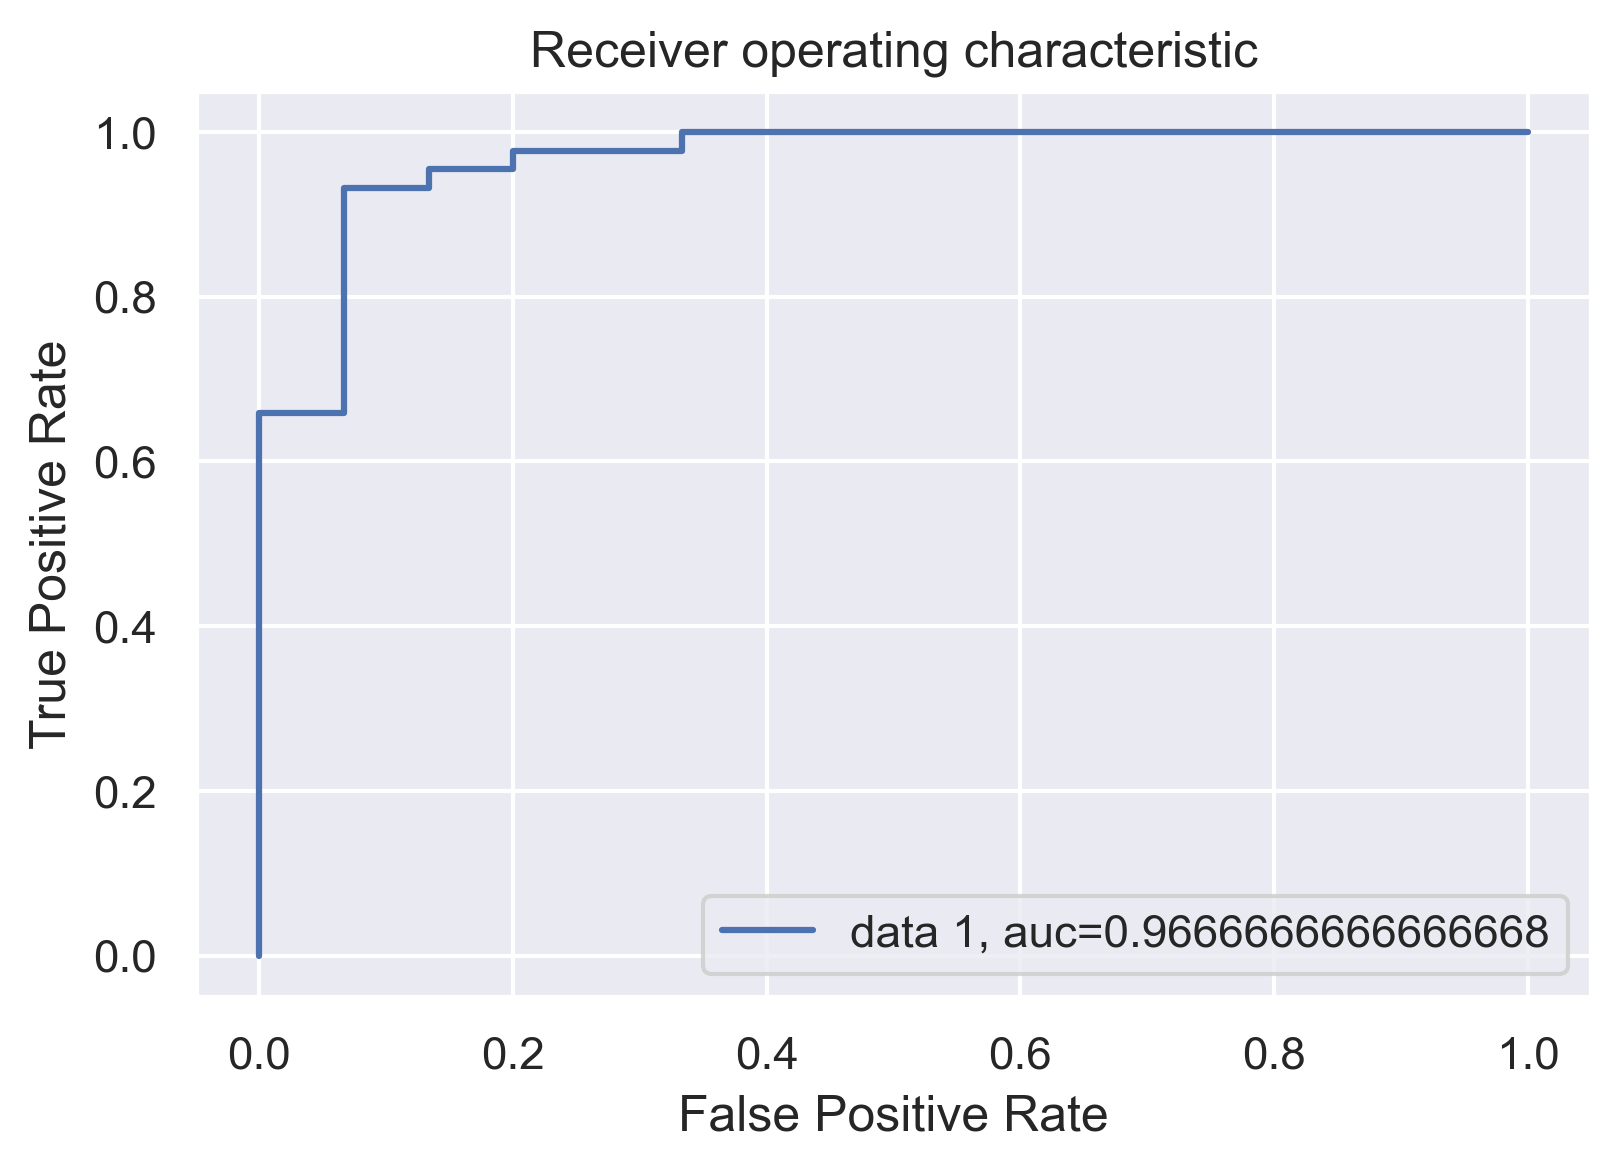

In [53]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Comparision of all Models

In [54]:
data = {"Model name": ["Logistic Regression","Decision Tree Classifier","Bagging", "AdaBoost", "Random Forest Classifier", "kNN", "SVM", "XGBoost"], "Accuracy(%)": ["86", "86", "88", "90", "88", "92", "86", "92"], "AUC Score": ["0.88","0.73","0.93","0.94","0.93","0.98","0.88", "0.97"]}
Companrison = pd.DataFrame(data)
Companrison

Model name Accuracy(%) AUC Score
0       Logistic Regression          86      0.88
1  Decision Tree Classifier          86      0.73
2                   Bagging          88      0.93
3                  AdaBoost          90      0.94
4  Random Forest Classifier          88      0.93
5                       kNN          92      0.98
6                       SVM          86      0.88
7                   XGBoost          92      0.97

**We can conclude that kNN Model is best for our dataset as it is giving highest AUC score. Also XGBoost Model giving good AUC i.e. 0.97 which is just 0.1 less than AUC score of kNN Model.**

**Hence we will make Prediction System for both kNN and XGBoost Model**

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

# Building the Prediction System

## Finding some data of peoples with no Parkinsons disease

In [55]:
df[df["status"]==0].head(2)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
30  phon_R01_S07_1      197.076       206.896       192.055         0.00289   
31  phon_R01_S07_2      199.228       209.512       192.091         0.00241   

    MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
30           0.00001   0.00166   0.00168     0.00498       0.01098   
31           0.00001   0.00134   0.00138     0.00402       0.01015   

    MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
30             0.097       0.00563       0.00680   0.00802      0.01689   
31             0.089       0.00504       0.00641   0.00762      0.01513   

        NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
30  0.00339  26.775       0  0.422229  0.741367 -7.348300  0.177551  1.743867   
31  0.00167  30.940       0  0.432439  0.742055 -7.682587  0.173319  2.103106   

         PPE  
30  0.085569  
31  0.068501

In [56]:
df.iloc[30].values

array(['phon_R01_S07_1', 197.076, 206.896, 192.055, 0.00289, 1e-05,
       0.00166, 0.00168, 0.00498, 0.01098, 0.097, 0.00563, 0.0068,
       0.00802, 0.01689, 0.00339, 26.775, 0, 0.422229, 0.741367, -7.3483,
       0.177551, 1.743867, 0.085569], dtype=object)

197.076, 206.896, 192.055, 0.00289, 1e-05,0.00166, 0.00168, 0.00498, 0.01098, 0.097, 0.00563, 0.0068,0.00802, 0.01689, 0.00339, 26.775, 0.422229, 0.741367, -7.3483,0.177551, 1.743867, 0.085569

In [57]:
df.iloc[31].values

array(['phon_R01_S07_2', 199.228, 209.512, 192.091, 0.00241, 1e-05,
       0.00134, 0.00138, 0.00402, 0.01015, 0.089, 0.00504, 0.00641,
       0.00762, 0.01513, 0.00167, 30.94, 0, 0.432439, 0.742055, -7.682587,
       0.173319, 2.103106, 0.068501], dtype=object)

199.228, 209.512, 192.091, 0.00241, 1e-05,0.00134, 0.00138, 0.00402, 0.01015, 0.089, 0.00504, 0.00641,0.00762, 0.01513, 0.00167, 30.94, 0.432439, 0.742055, -7.682587, 0.173319, 2.103106, 0.068501

## Finding some data of peoples with Parkinsons disease

In [58]:
df[df["status"]==1].head(2)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   

        PPE  
0  0.284654  
1  0.368674

In [59]:
df.iloc[0].values

array(['phon_R01_S01_1', 119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037,
       0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971,
       0.06545, 0.02211, 21.033, 1, 0.414783, 0.815285, -4.813031,
       0.266482, 2.301442, 0.284654], dtype=object)

119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654

In [60]:
df.iloc[1].values

array(['phon_R01_S01_2', 122.4, 148.65, 113.819, 0.00968, 8e-05, 0.00465,
       0.00696, 0.01394, 0.06134, 0.626, 0.03134, 0.04518, 0.04368,
       0.09403, 0.01929, 19.085, 1, 0.458359, 0.819521, -4.075192,
       0.33559, 2.486855, 0.368674], dtype=object)

122.4, 148.65, 113.819, 0.00968, 8e-05, 0.00465,0.00696, 0.01394, 0.06134, 0.626, 0.03134, 0.04518, 0.04368,0.09403, 0.01929, 19.085, 0.458359, 0.819521, -4.075192,0.33559, 2.486855, 0.368674

## Prediction System - kNN

In [61]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if knn.predict(in_data_sca) else "No Parkinson's Disease Detected")

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
Parkinson's Disease Detected


## Prediction System - XGBoost

In [62]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if xgb.predict(in_data_sca) else "No Parkinson's Disease Detected")

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
Parkinson's Disease Detected


## Extra data on which you can try our both Prediction System

**Parkinsons disease positive**

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

**Parkinsons disease negative**

115.38000,123.10900,108.63400,0.00332,0.00003,0.00160,0.00199,0.004800,0.01503,0.13700,0.00812,0.00933,0.01133,0.02436,0.00401,26.00500,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067